In [43]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = './data.csv'  
df = pd.read_csv(file_path)

significant_column = 'Nationality' 

Nationalities = df[significant_column].unique().tolist()
count = len(Nationalities)

print(Nationalities)
# print(count)

['Bosnia and Herzegovina', 'Iraq', 'China', 'Azerbaijan', 'Pakistan', 'Syria', 'India', 'United Kingdom', 'Burkina Faso', 'Uganda', 'Nigeria', 'France', 'Tajikistan', 'Tanzania', 'Bahrain', 'Belgium', 'Myanmar', 'United States of America', 'Gambia', 'Netherlands', 'Turkey', 'Philippines', 'Ivory Coast', 'Russia', 'Thailand', 'Sudan', 'Kenya', 'Tunisia', 'Guinea', 'Bangladesh', 'Saudi Arabia', 'Lebanon', 'Yemen', 'Mali', nan, 'Malawi', 'Niger', 'Senegal', 'Cameroon', 'Ghana', 'Malaysia', 'Indonesia', 'Rwanda', 'Kyrgyzstan', 'Chile', 'Congo', 'Spain', 'Portugal', 'Hungary', 'Poland', 'Slovakia', 'Armenia', 'Italy', 'Georgia', 'Germany', 'Belarus', 'Romania', 'Kazakhstan', 'Ukraine', 'Austria', 'Serbia', 'Australia', 'Bulgaria', 'Croatia', 'Argentina', 'Afghanistan', 'Czech Republic', 'Colombia', 'Uzbekistan', 'North Macedonia', 'Switzerland', 'Iran', 'Madagascar', 'Africa', 'Oman', 'Kuwait', 'Palestine', 'Algeria', 'Sri Lanka']


In [44]:
significant_column = 'main_category' 
mani_categories =  df[significant_column].unique().tolist()
print(mani_categories)

['Punctuation', 'Form', 'Main signs', 'Diacritic signs', nan]


In [45]:
significant_column = 'sub_category_1' 
sub_category_1 =  df[significant_column].unique().tolist()
print(sub_category_1)

[nan, 'Boundary', 'Consonants', 'Vowels', 'Tashdid', 'Madd', 'Tanwin', 'Alif Lam', 'Place', 'Dot']


In [31]:
# significant_column = 'sub_category_2' 
# sub_category_2 =  df[significant_column].unique().tolist()
# print(sub_category_2)

In [46]:

columns_to_check = ['process', 'main_category', 'sub_category_1']

# Check if all required columns are present in the DataFrame
for column in columns_to_check:
    if column not in df.columns:
        raise KeyError(f"ستون '{column}' در DataFrame وجود ندارد")

# Select only the columns to check
df_selected_columns = df[columns_to_check]

# Find the unique combinations of the specified columns
unique_combinations_df = df_selected_columns.drop_duplicates()

# Print the DataFrame with unique combinations
print(unique_combinations_df)


display(unique_combinations_df.loc[(unique_combinations_df['main_category']=='Punctuation') & (unique_combinations_df['sub_category_1']== 'Consonants')  ,
                    ['main_category','sub_category_1']])

           process    main_category sub_category_1
0         Omission      Punctuation            NaN
1      Replacement      Punctuation            NaN
2      Replacement             Form       Boundary
7      Replacement       Main signs     Consonants
10     Replacement       Main signs         Vowels
...            ...              ...            ...
6513           ADD             Form         Vowels
6821  Displacement  Diacritic signs       Boundary
7848   Replacement             Form       Alif Lam
8083           NaN       Main signs         Vowels
9524  Displacement  Diacritic signs         Tanwin

[67 rows x 3 columns]


main_category sub_category_1
4872   Punctuation     Consonants

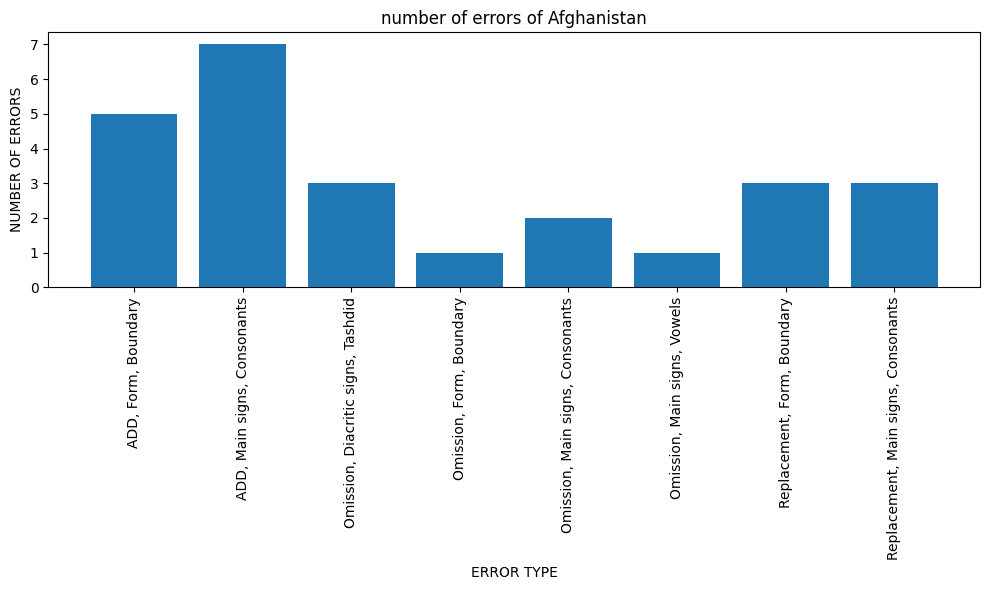

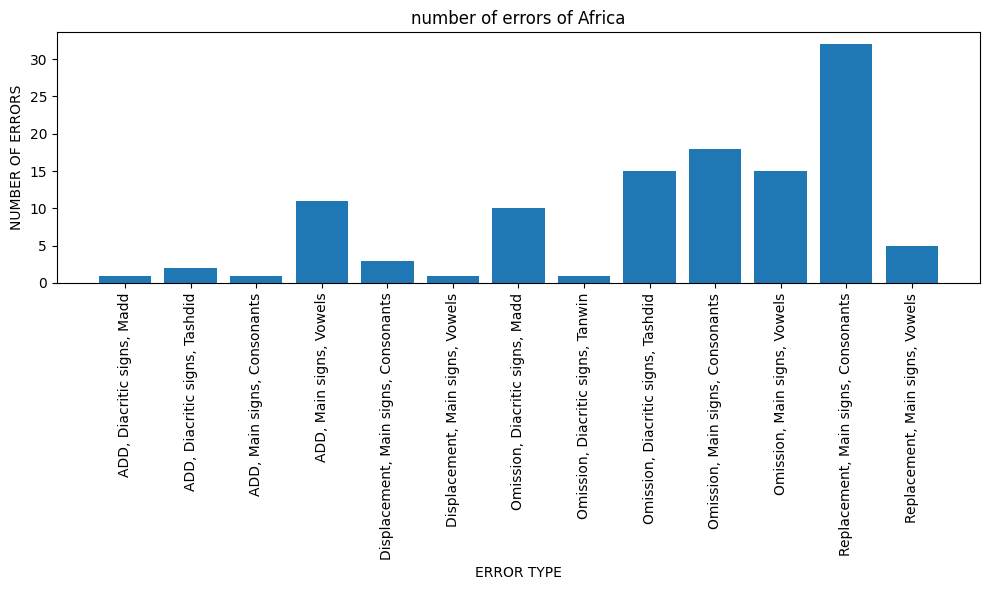

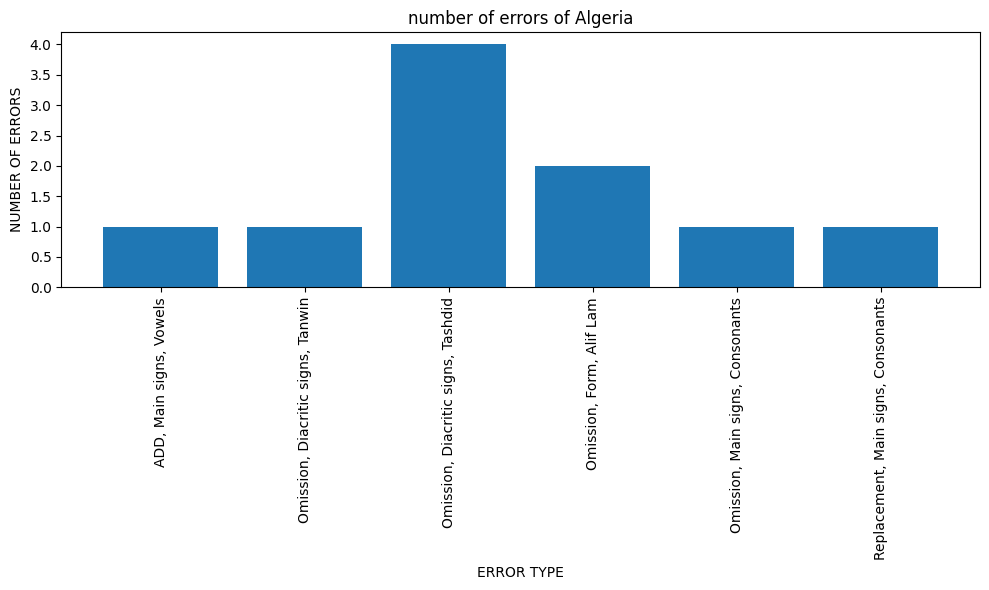

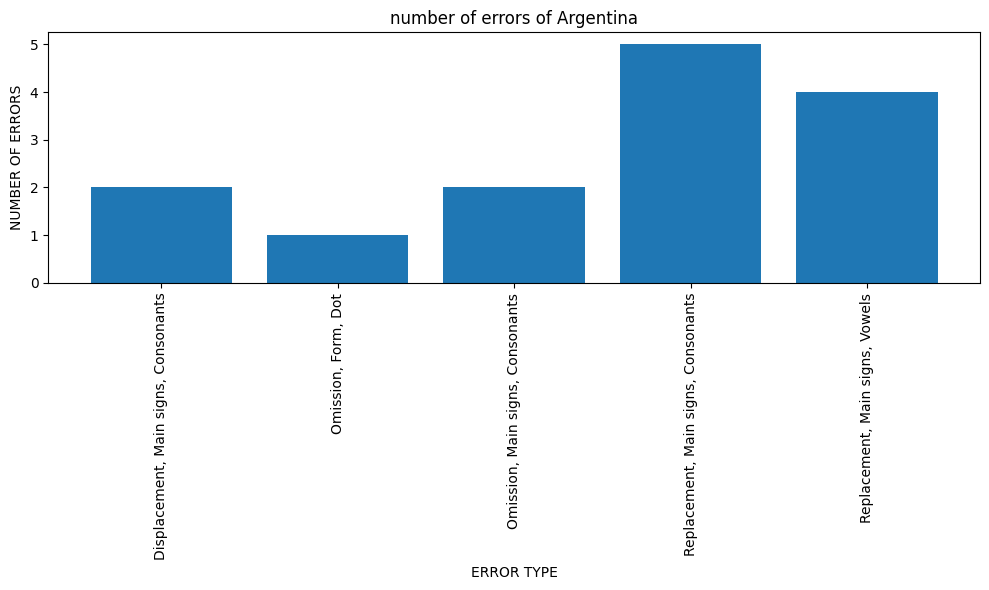

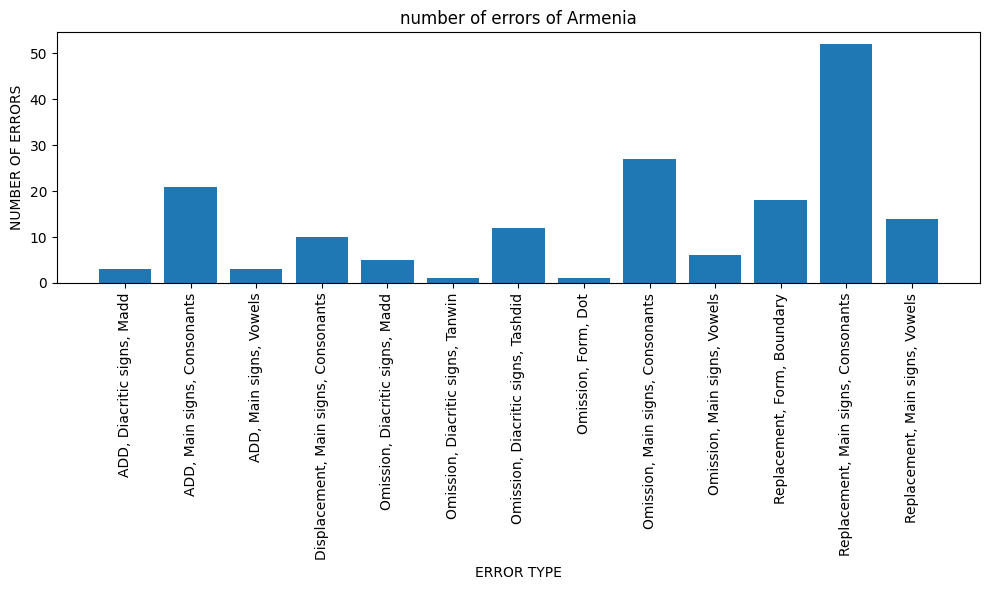

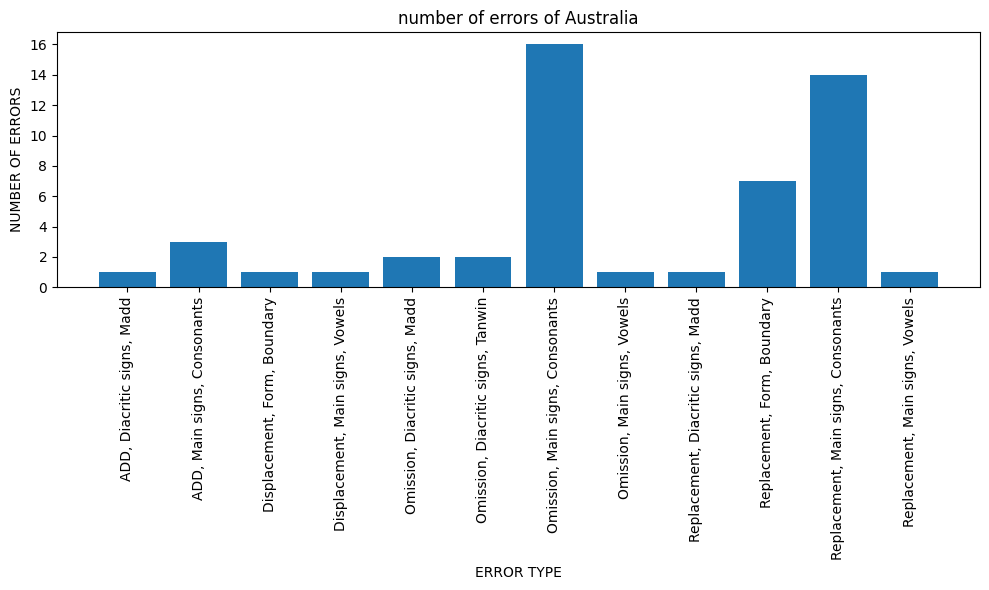

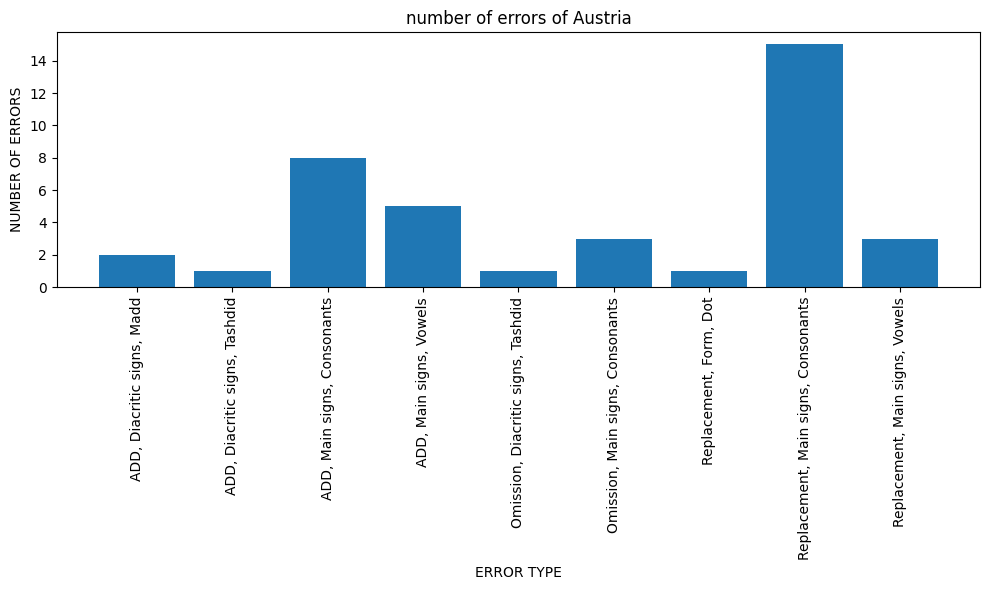

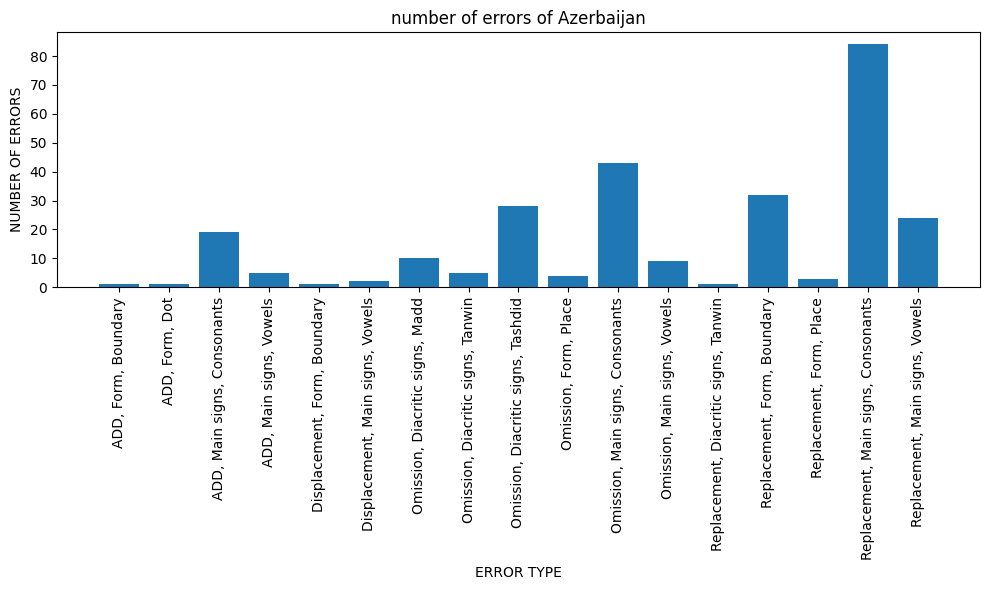

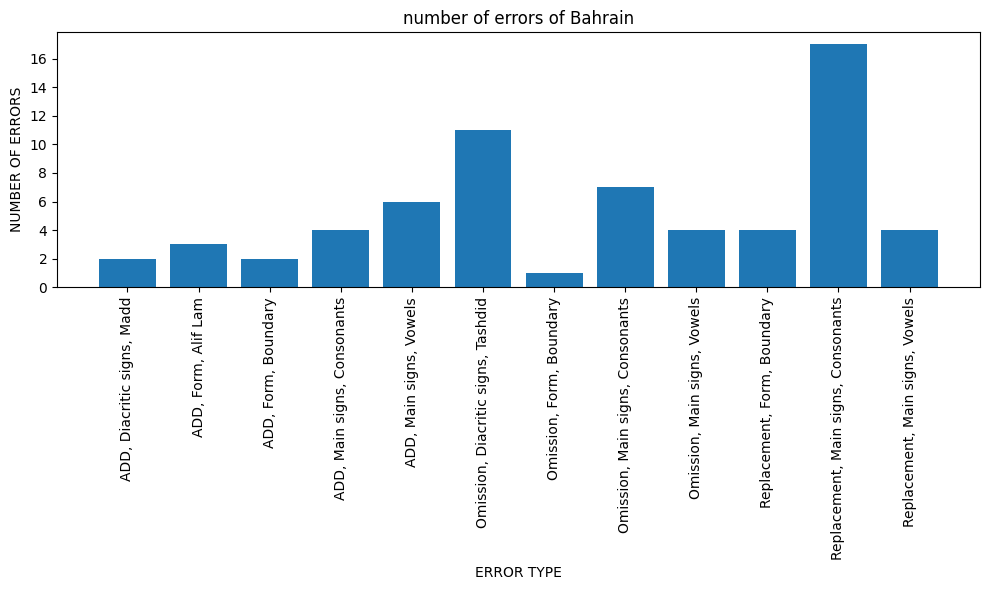

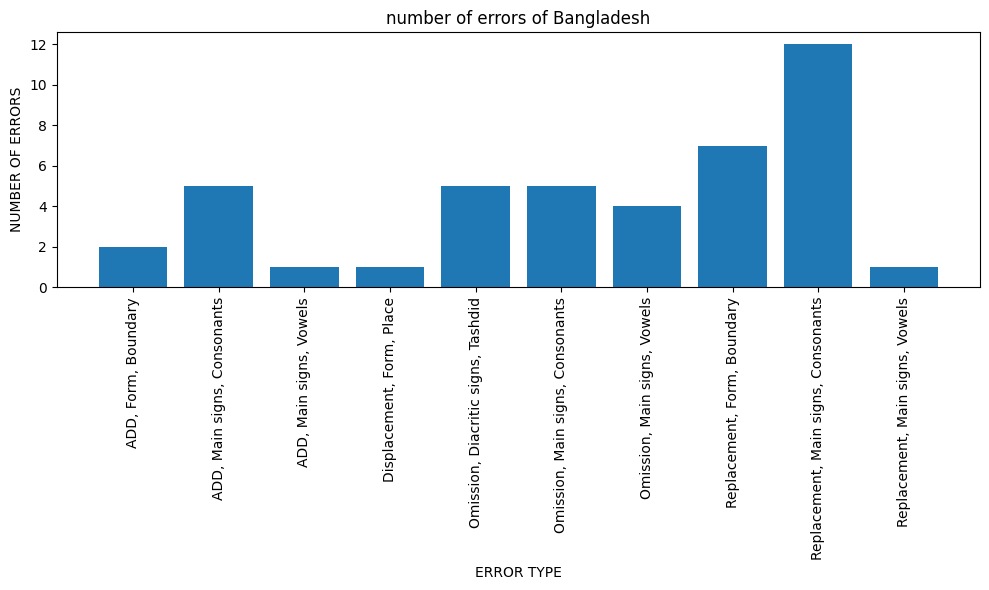

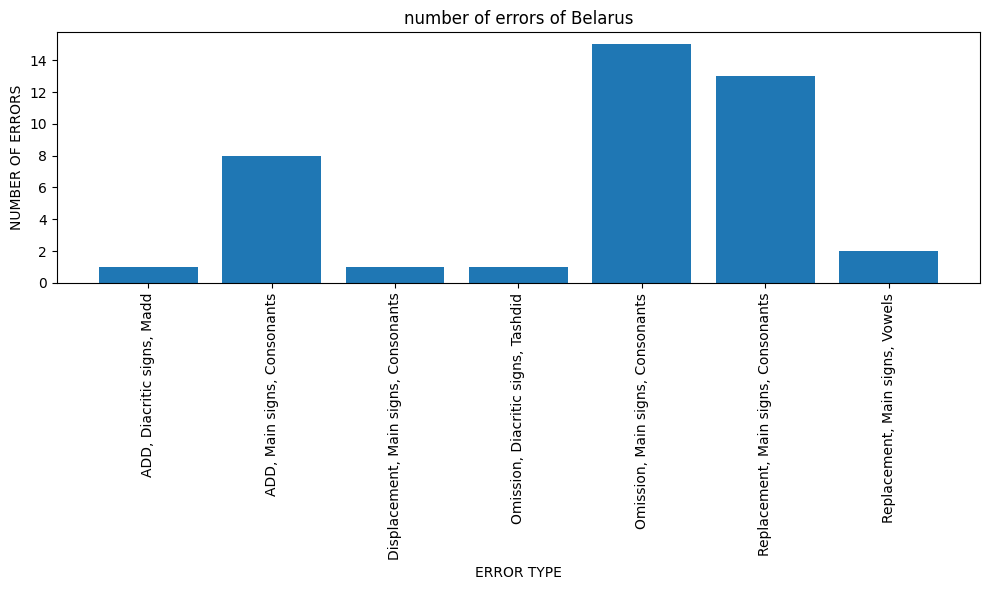

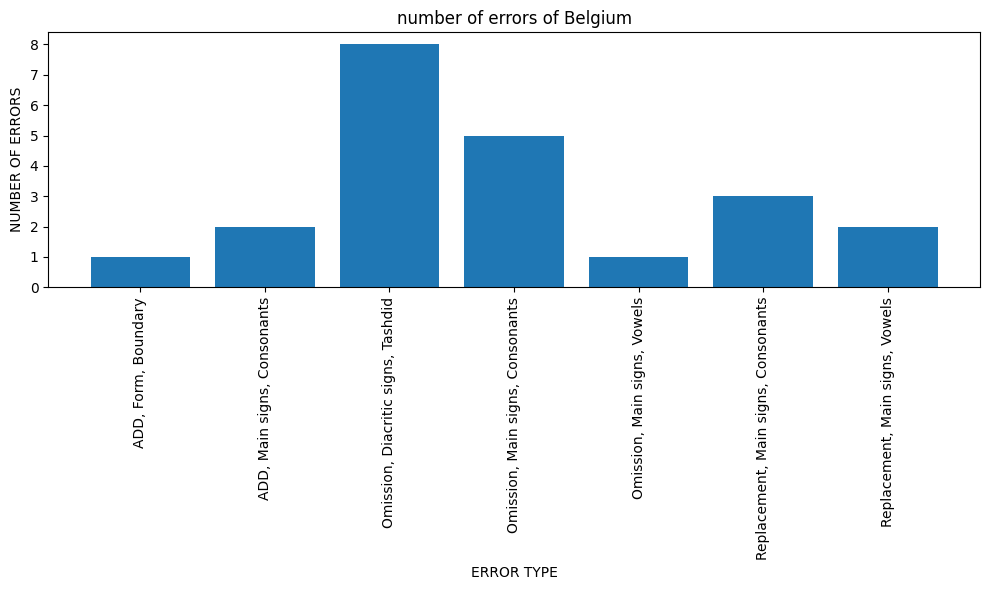

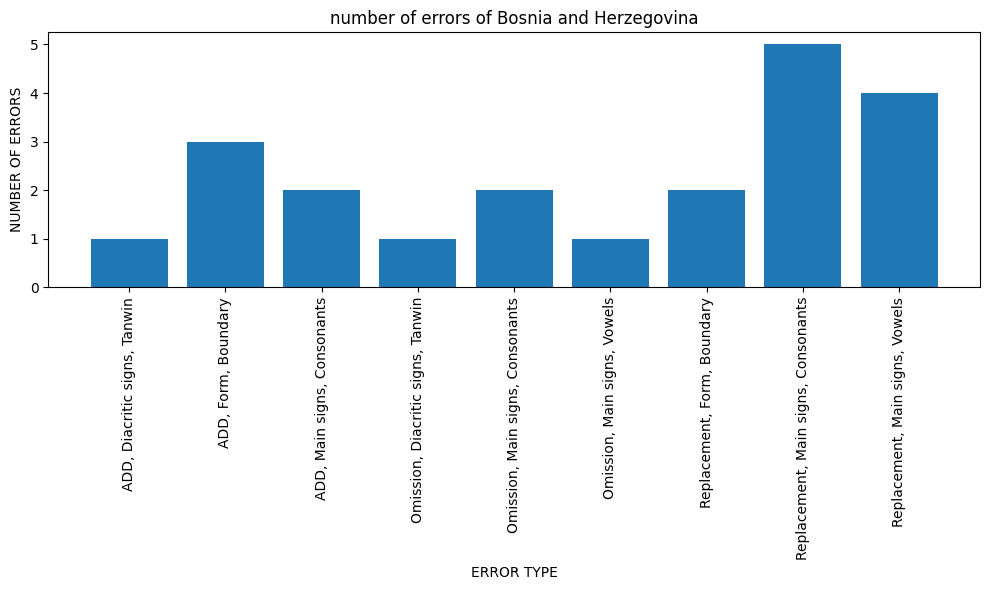

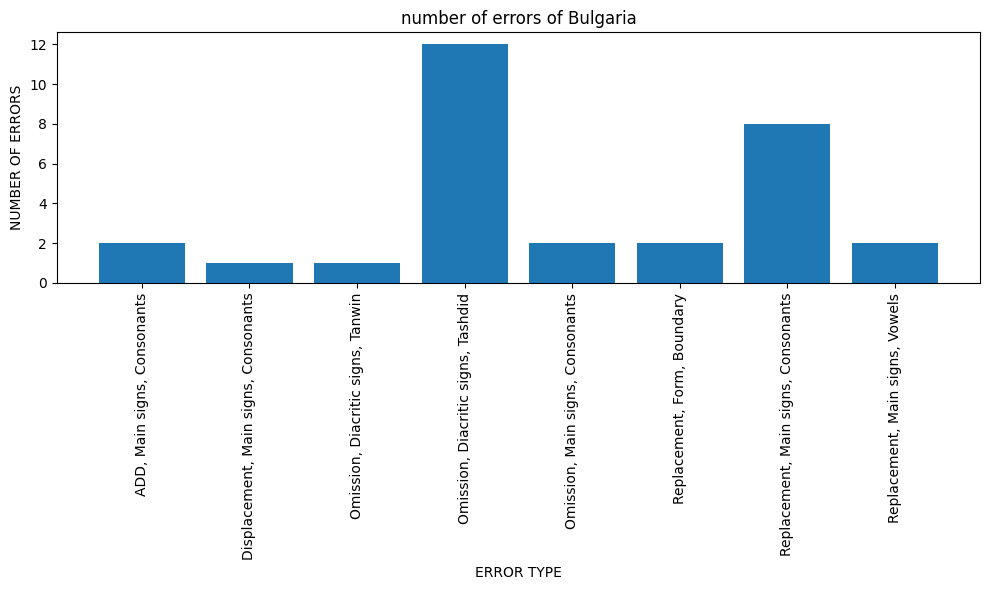

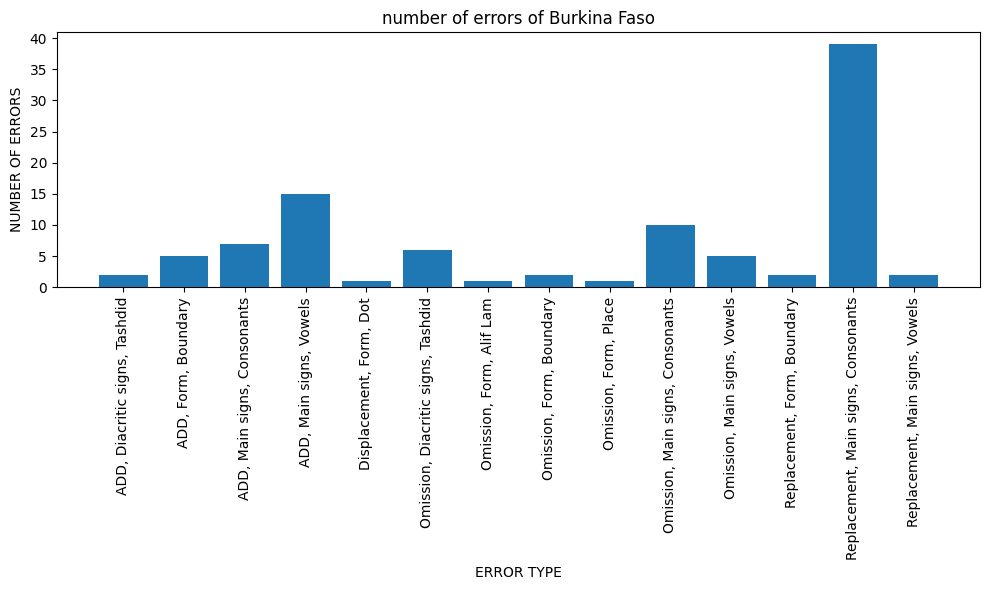

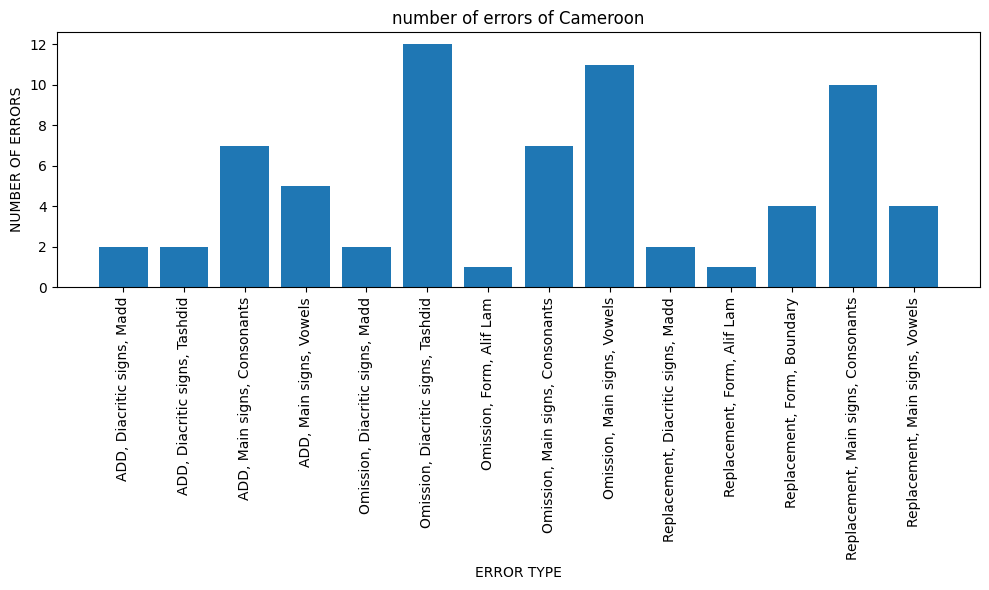

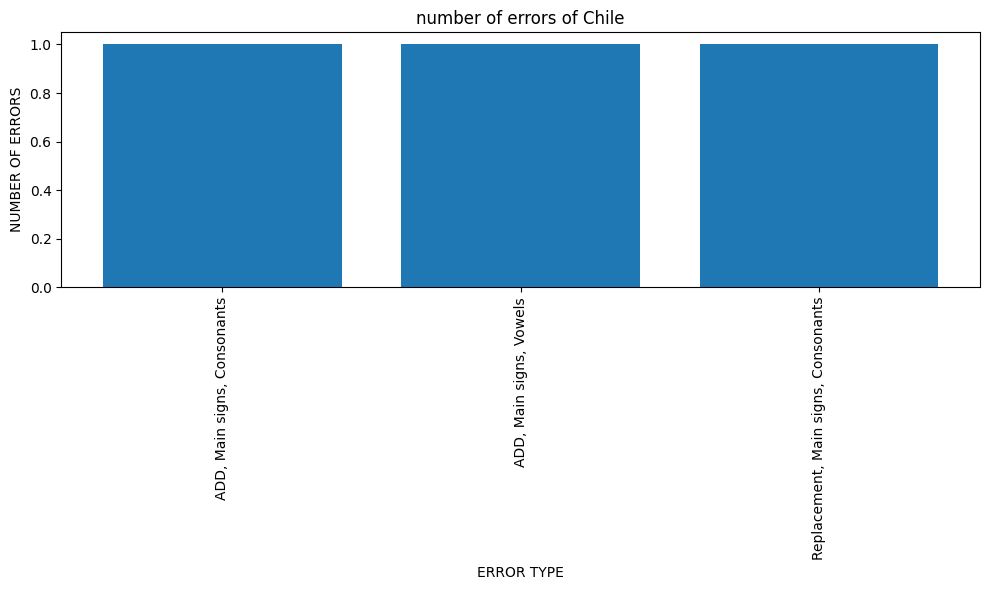

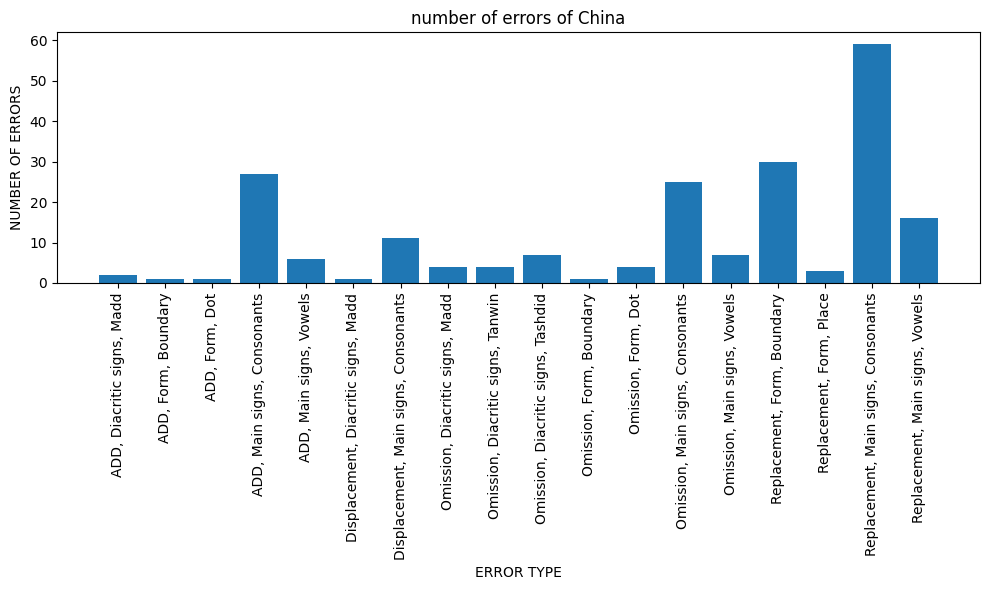

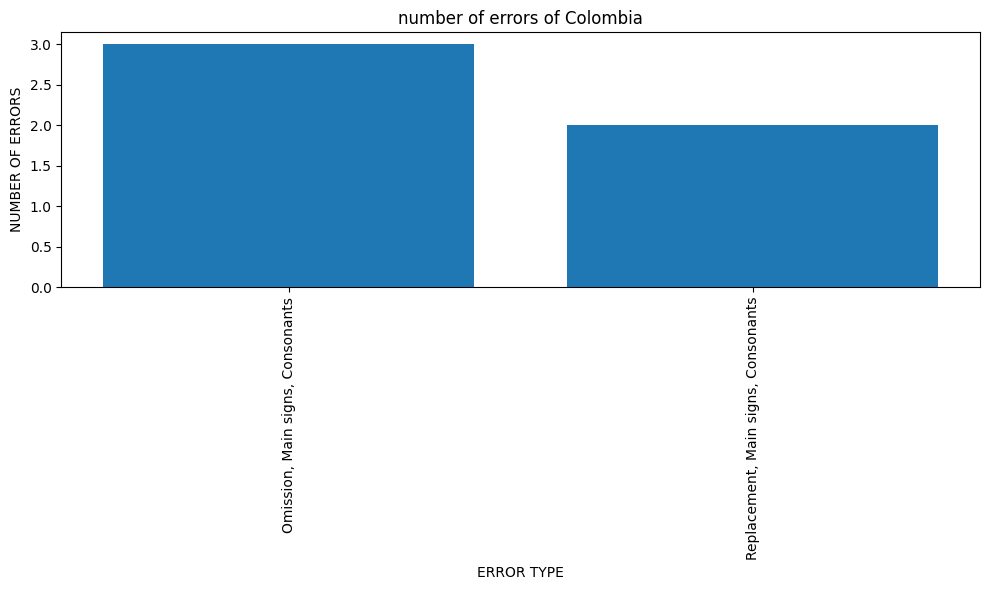

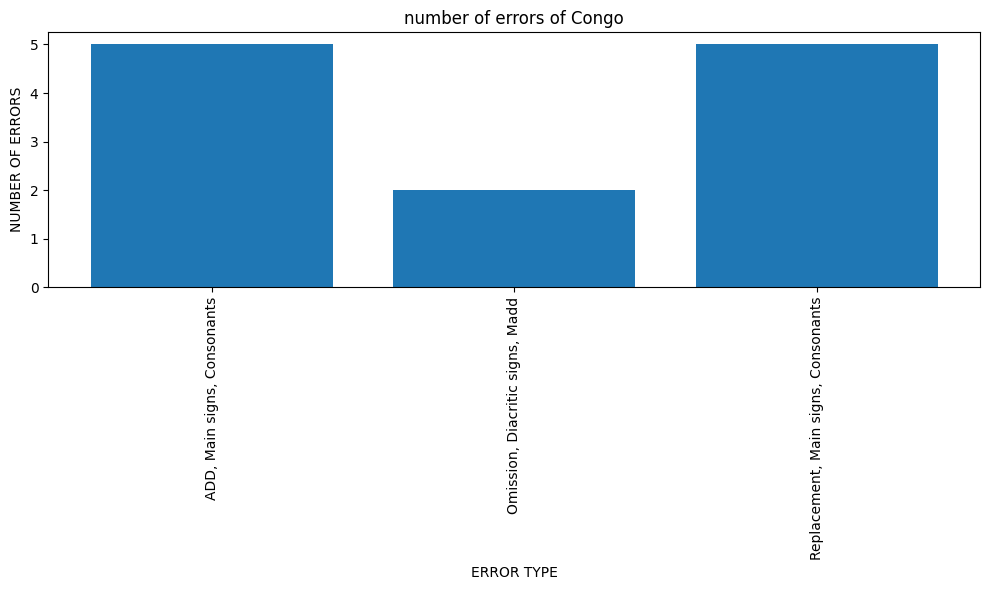

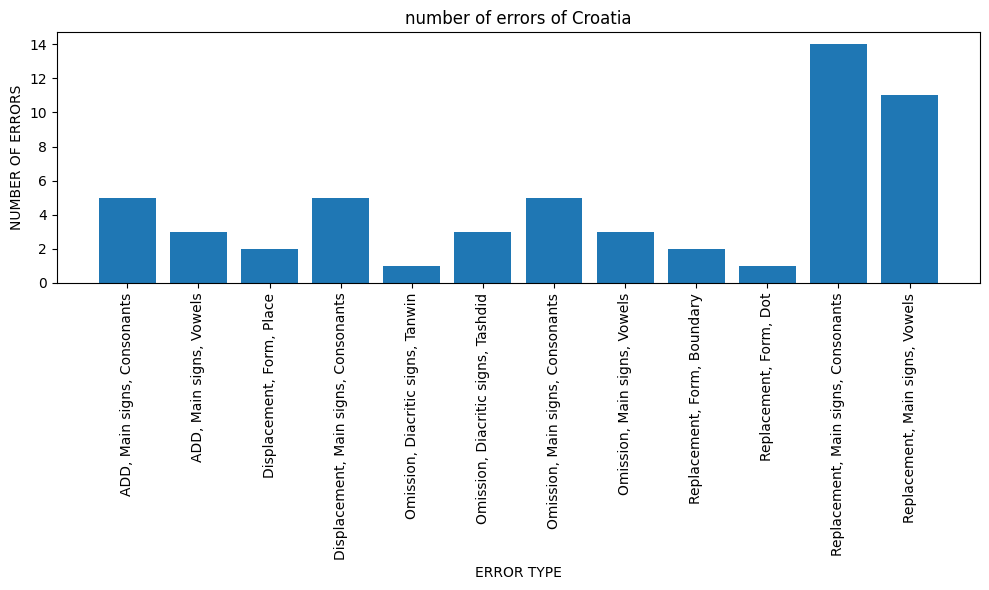

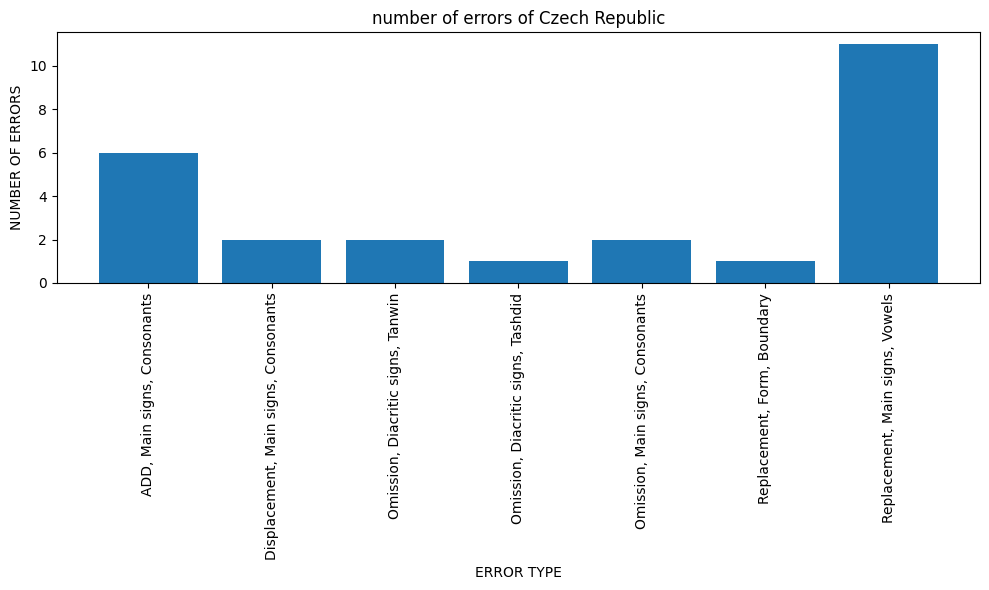

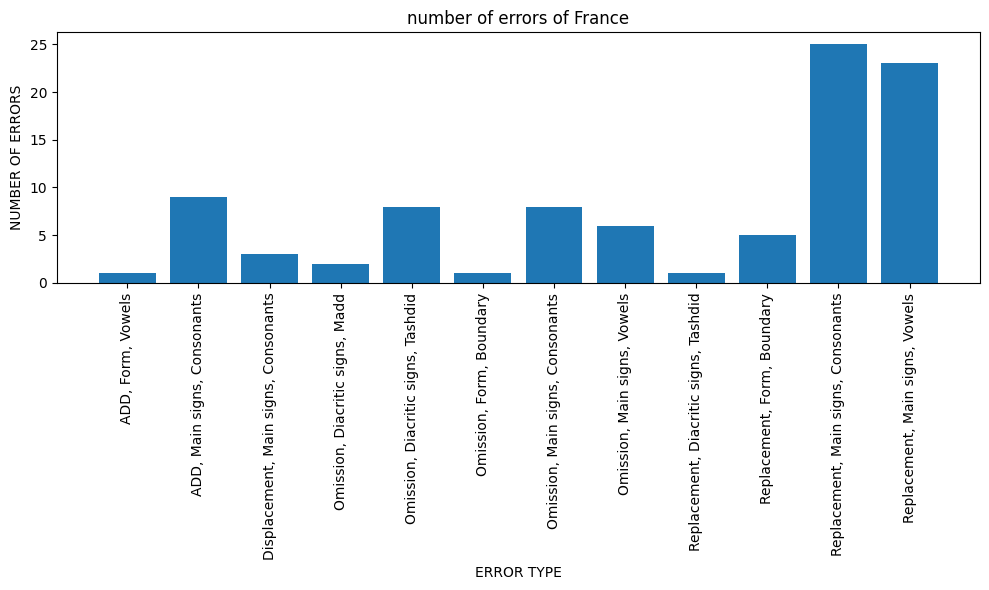

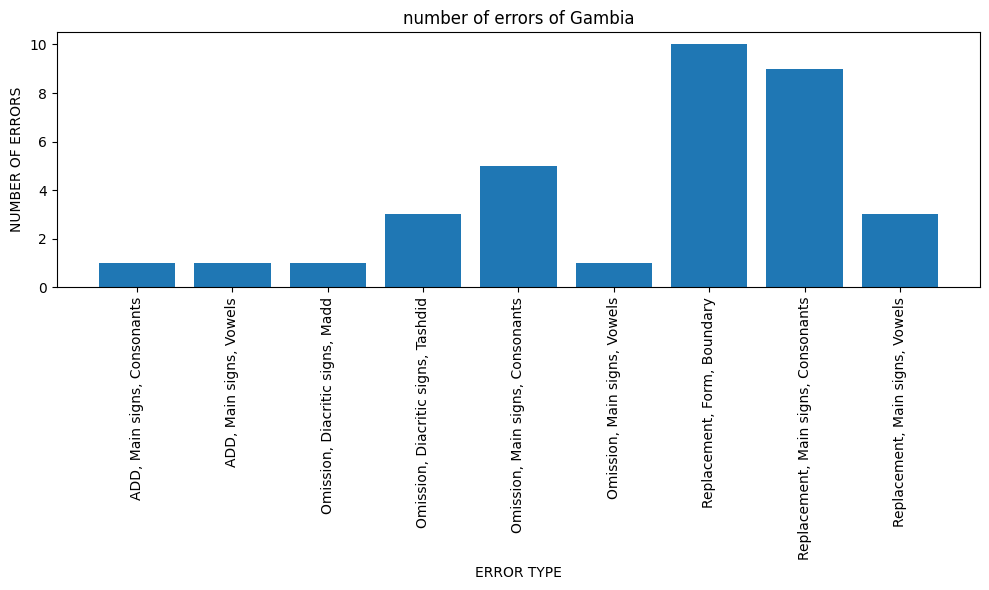

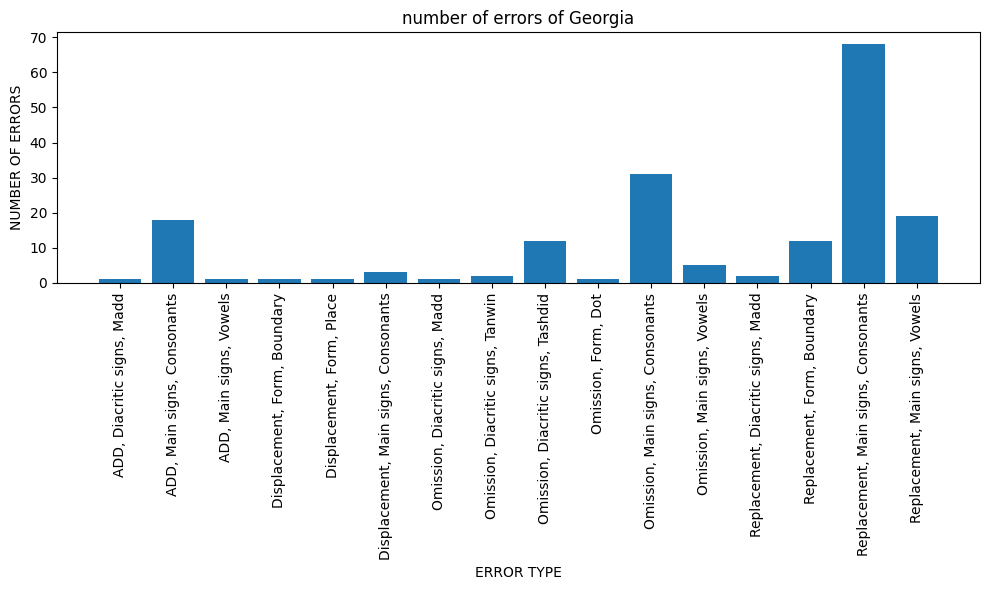

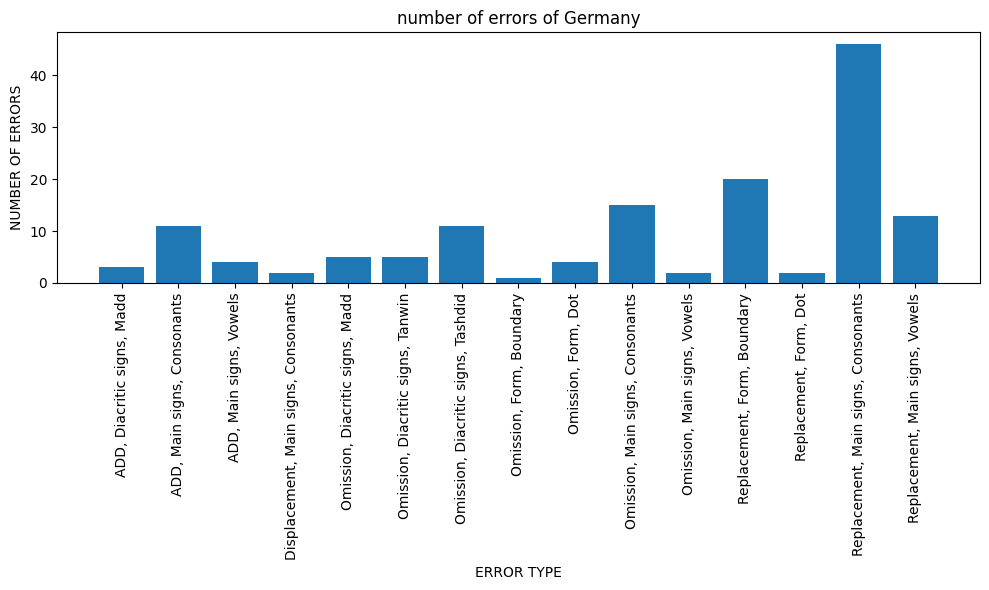

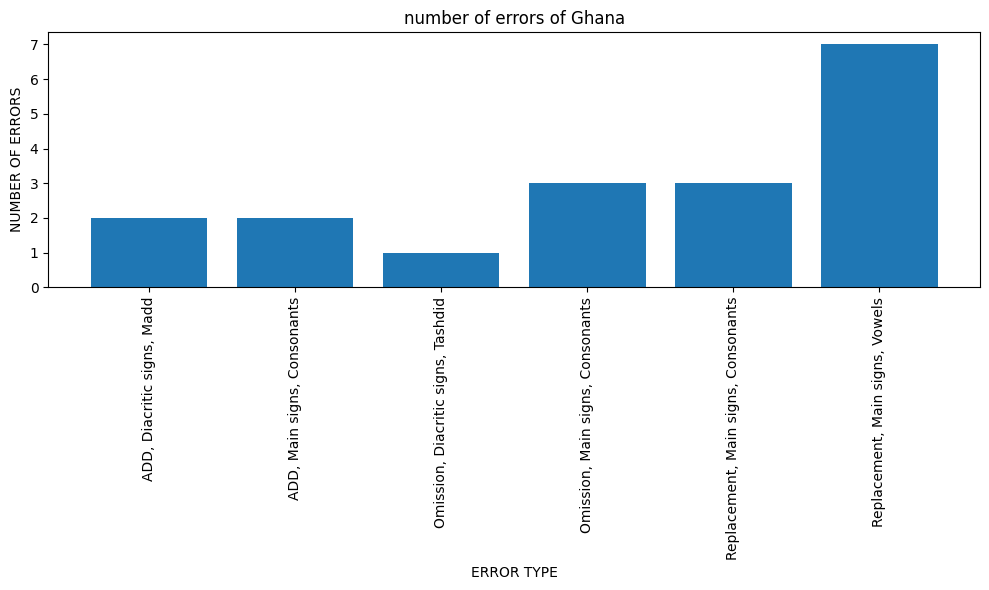

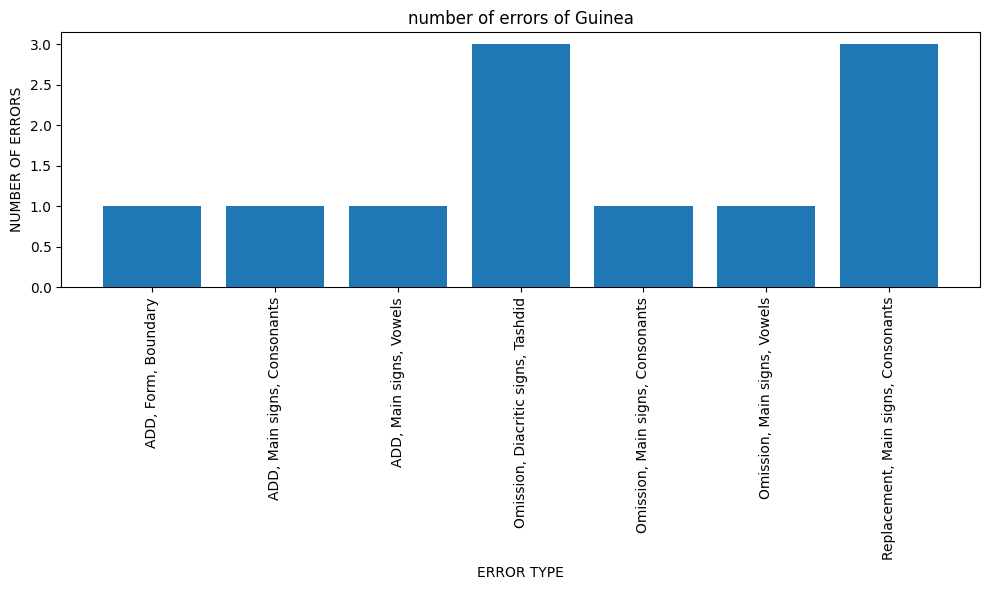

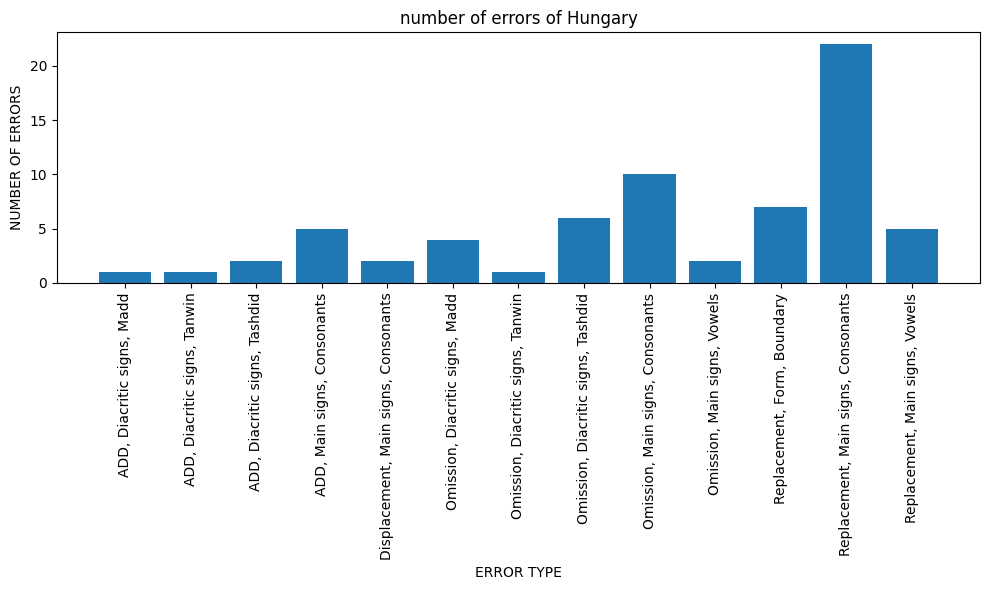

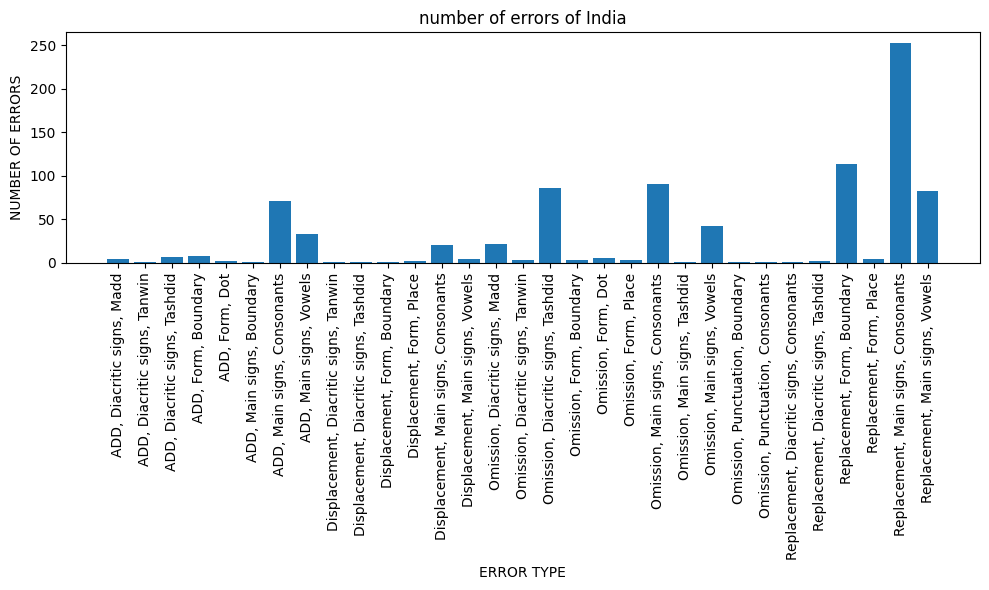

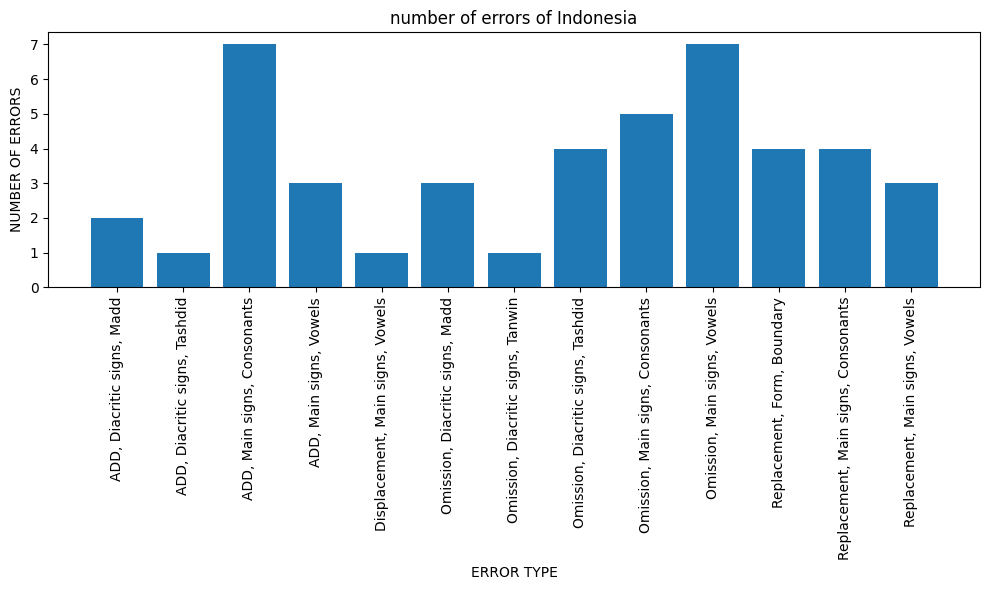

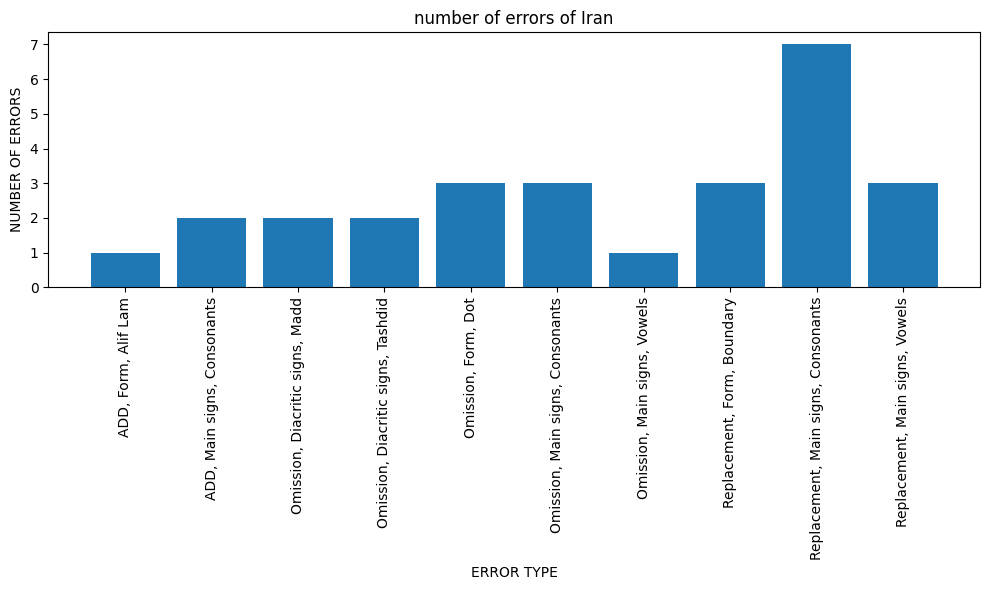

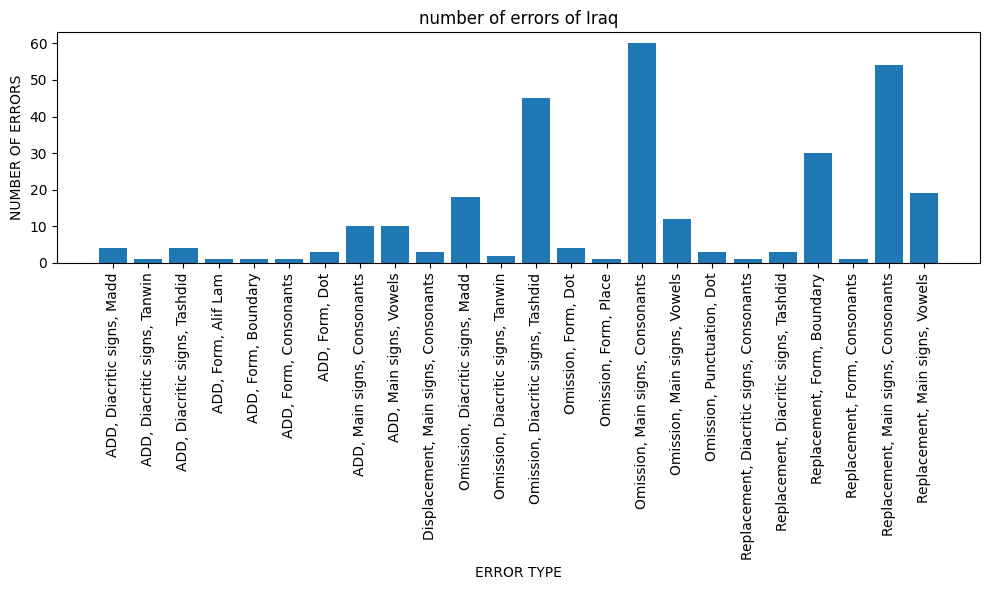

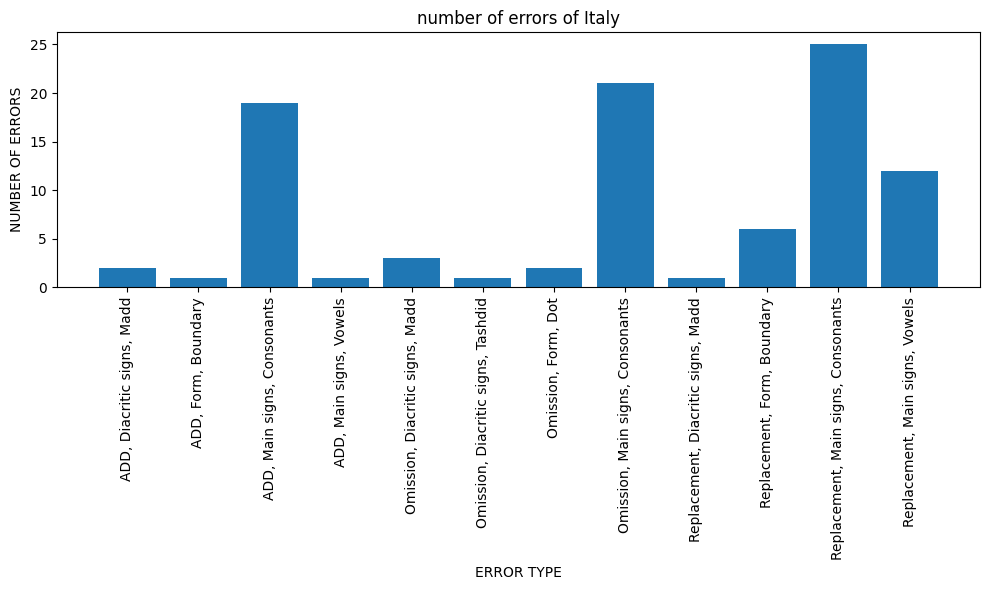

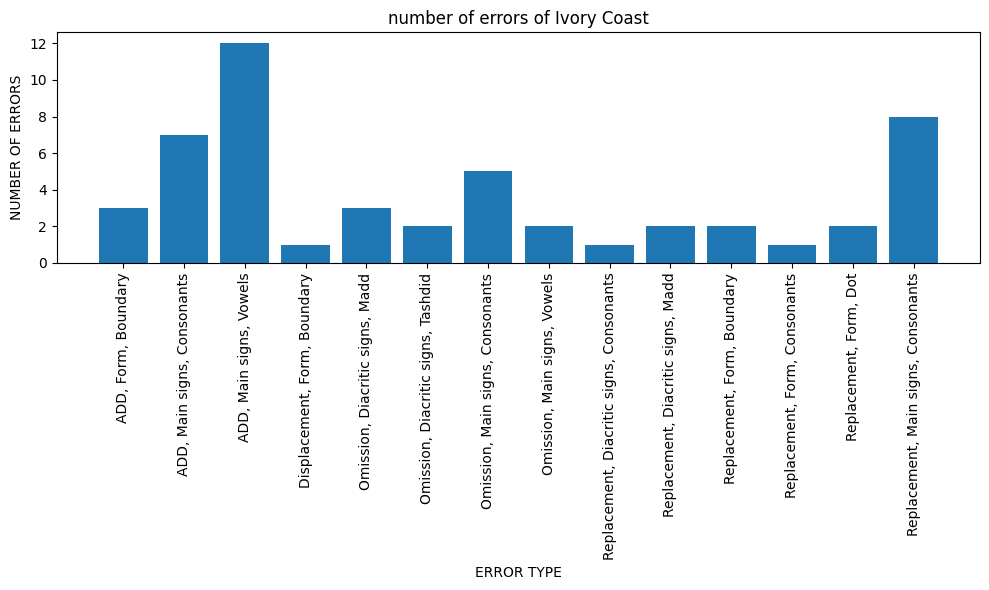

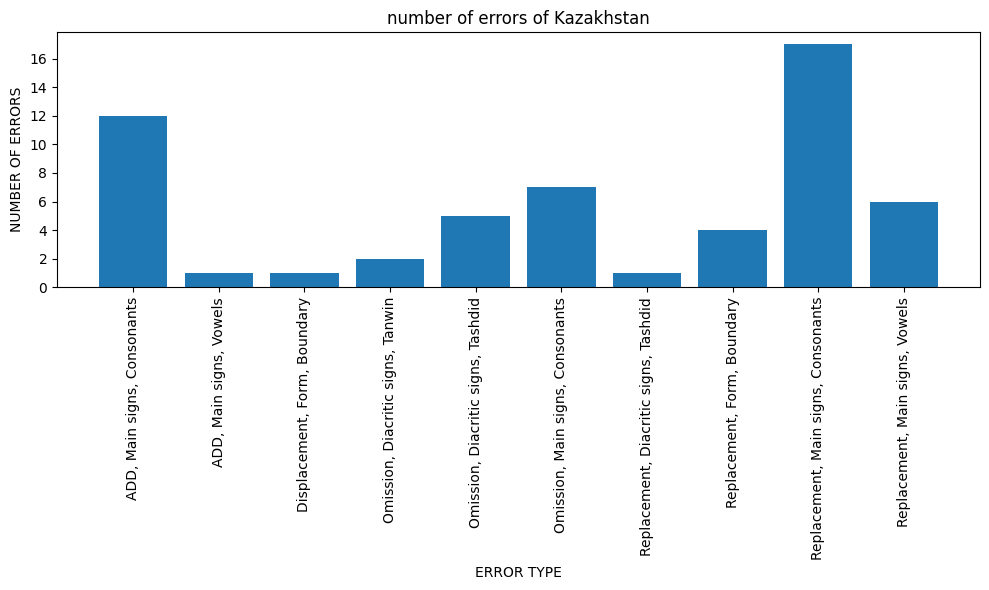

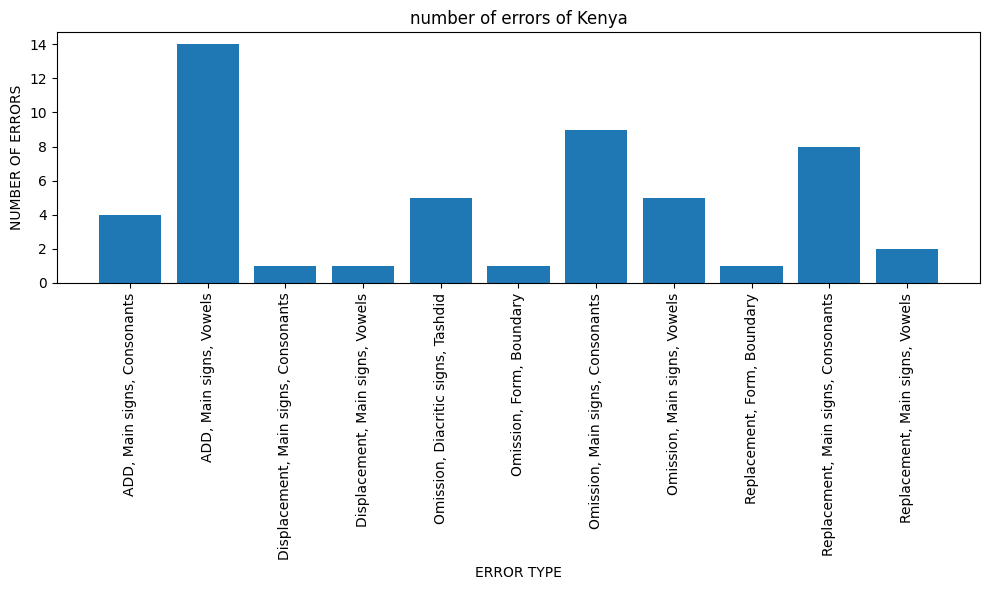

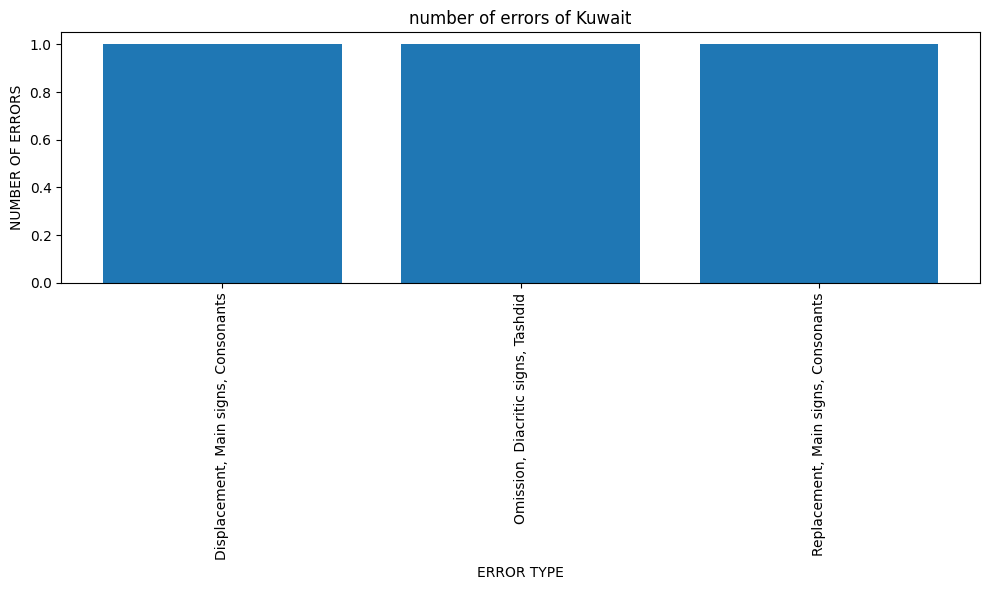

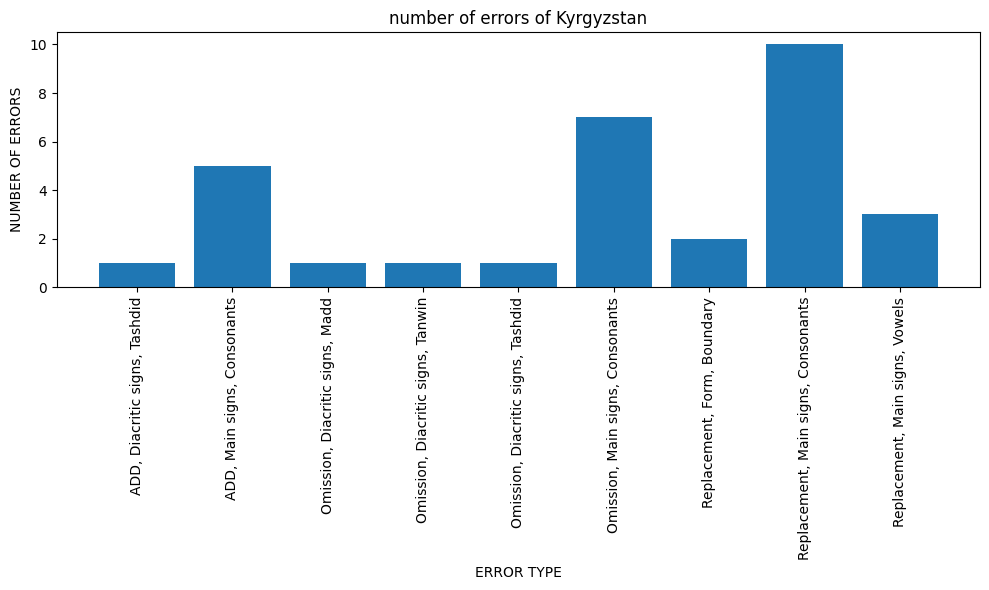

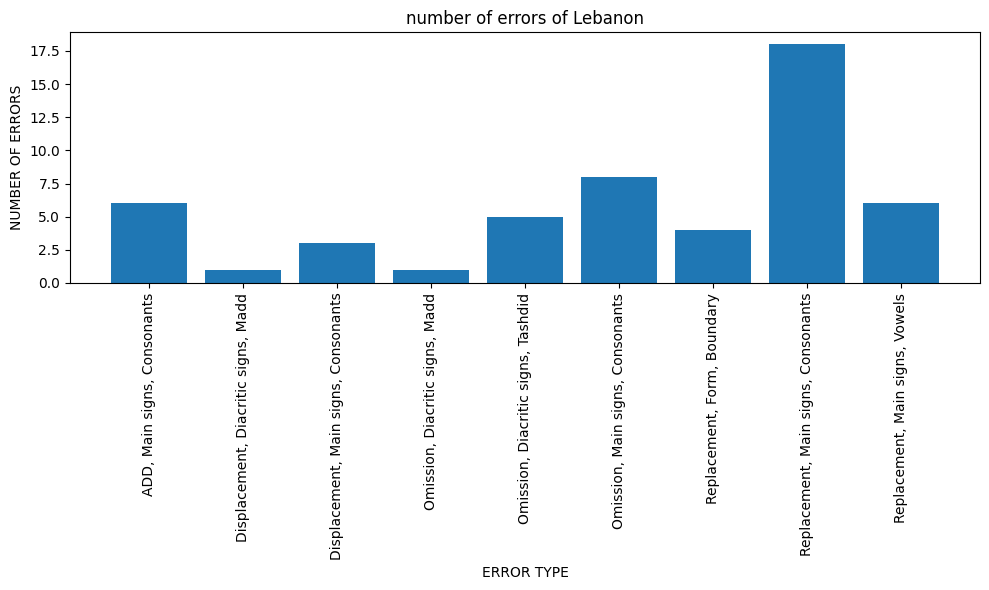

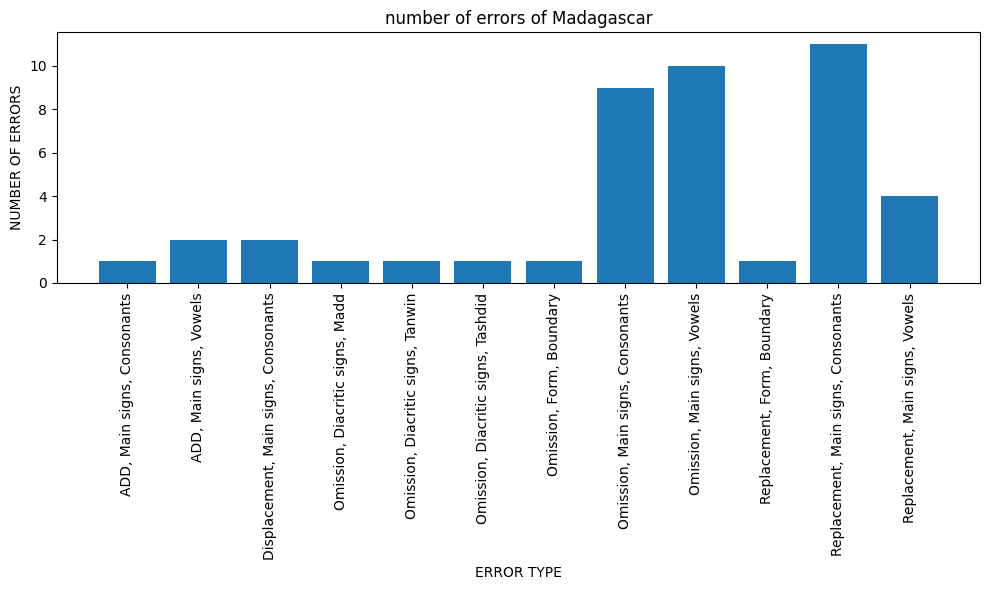

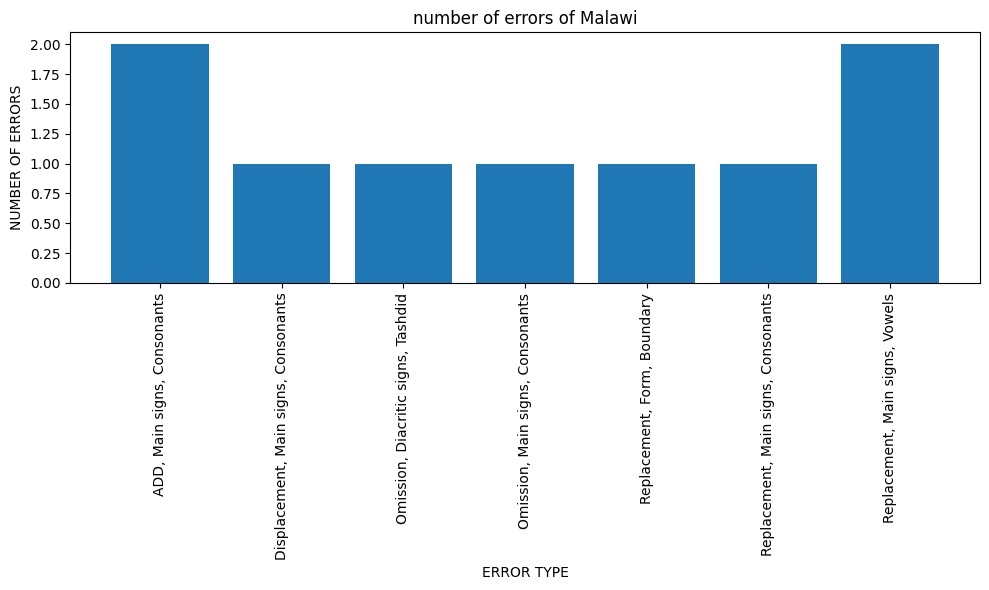

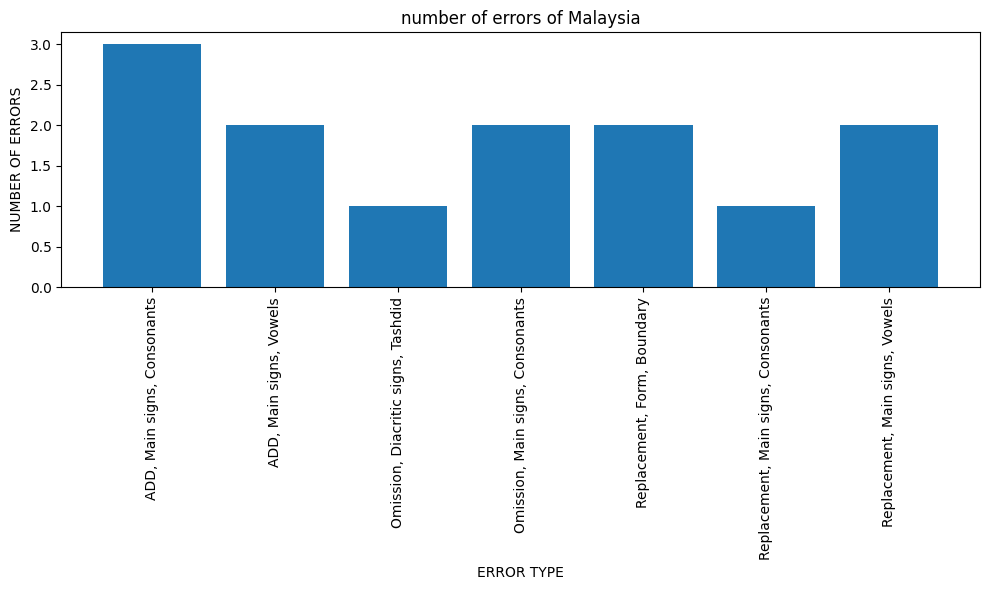

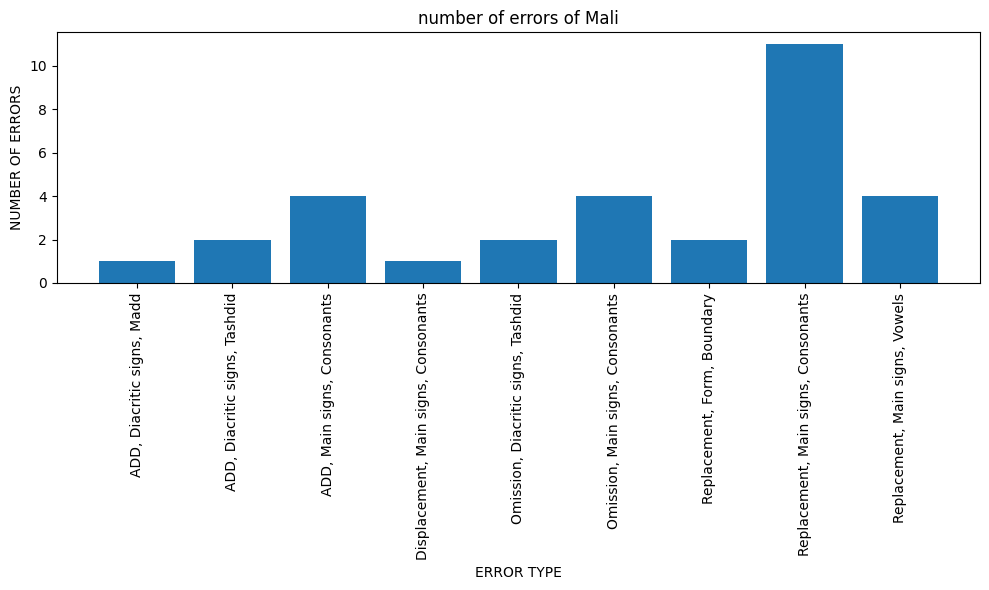

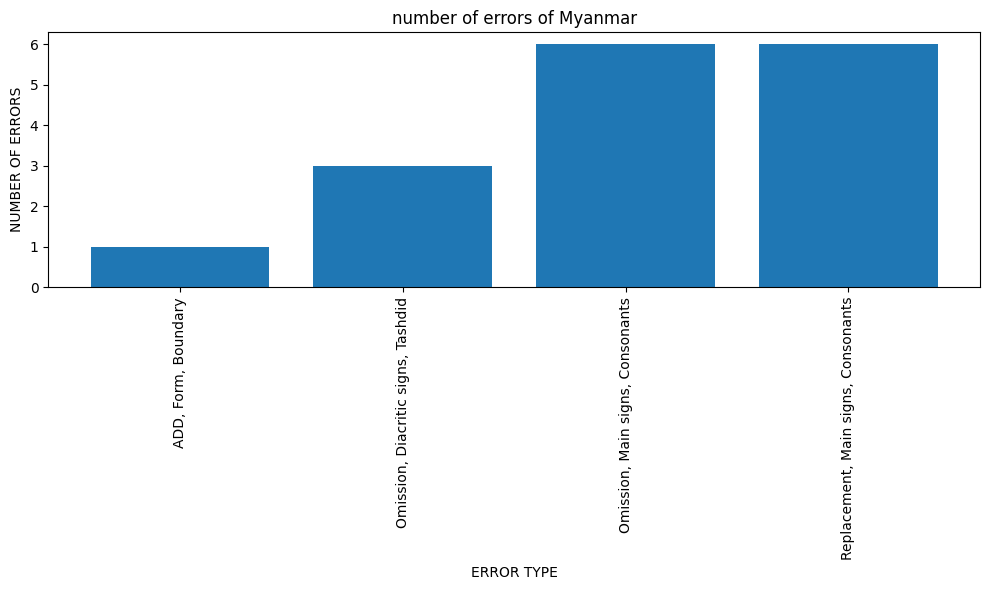

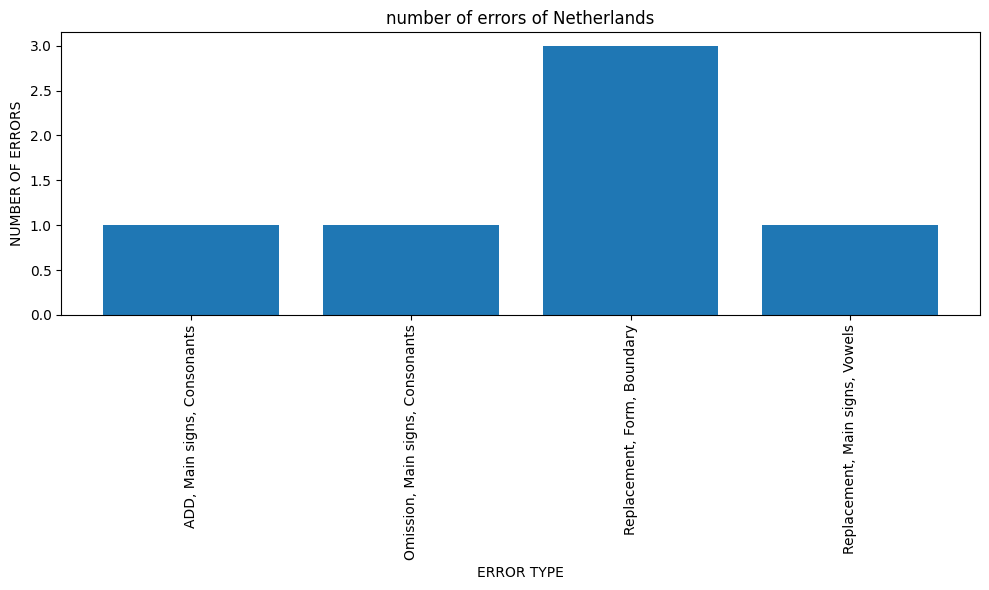

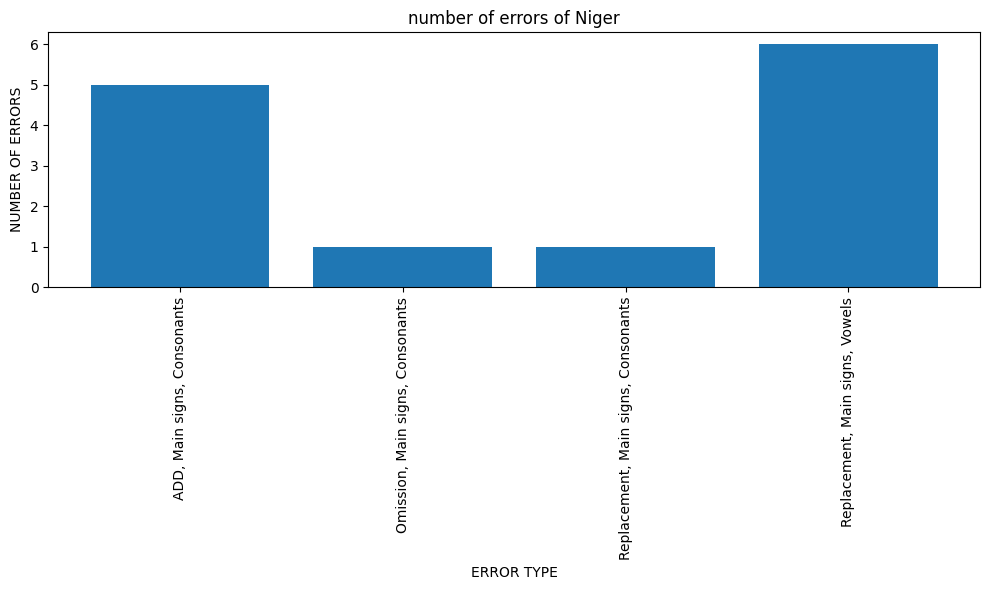

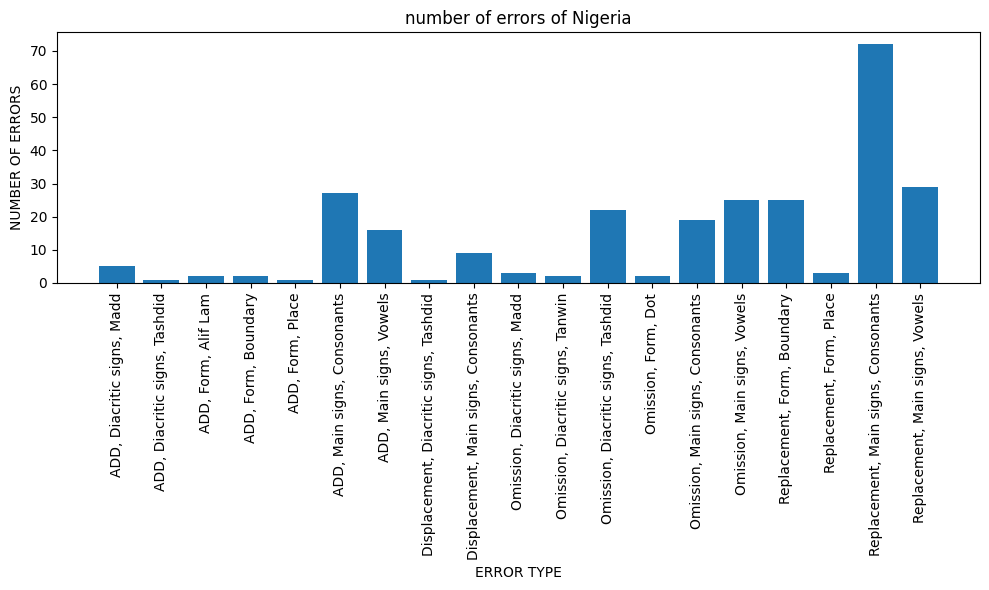

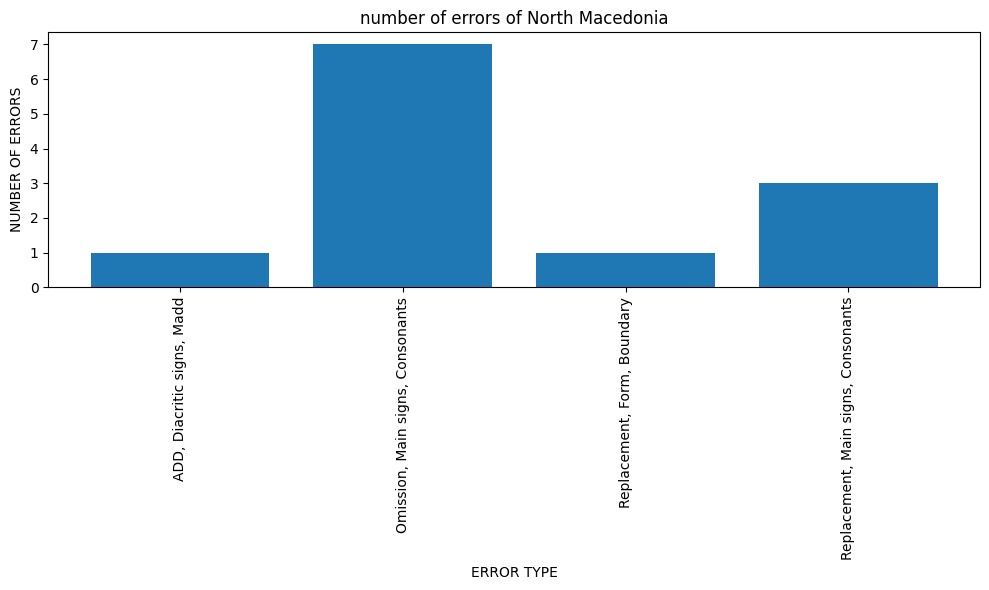

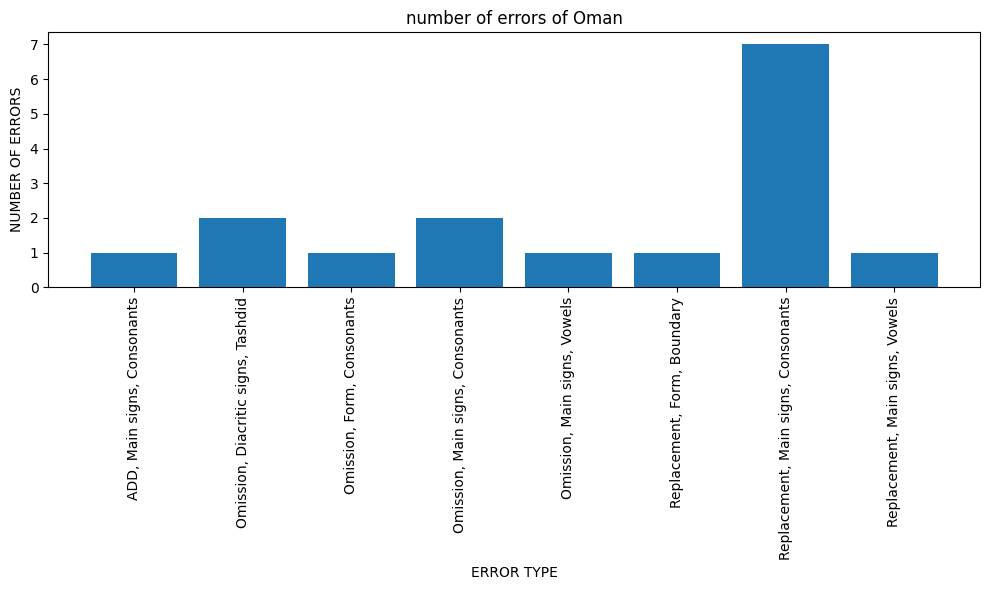

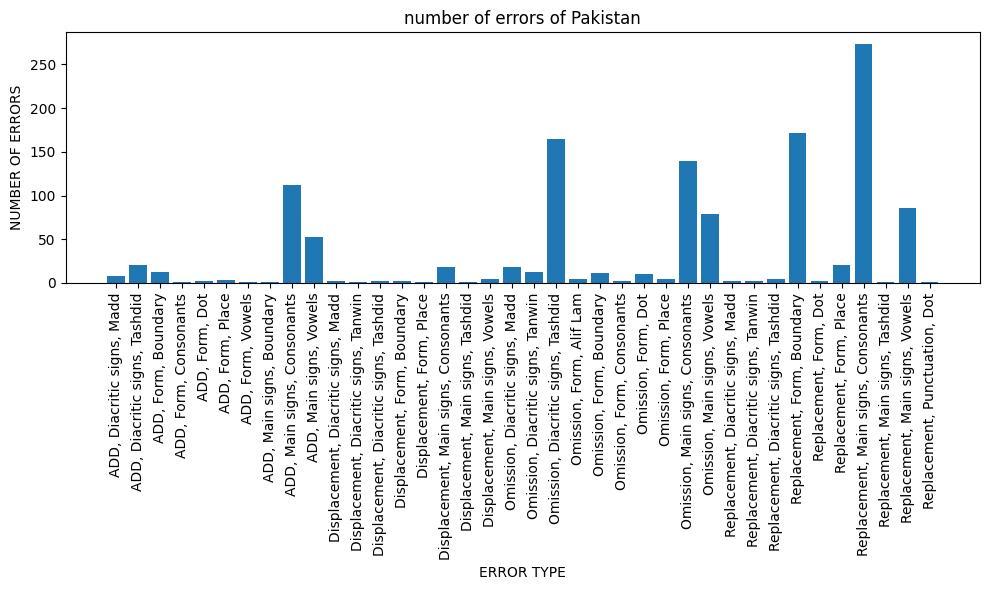

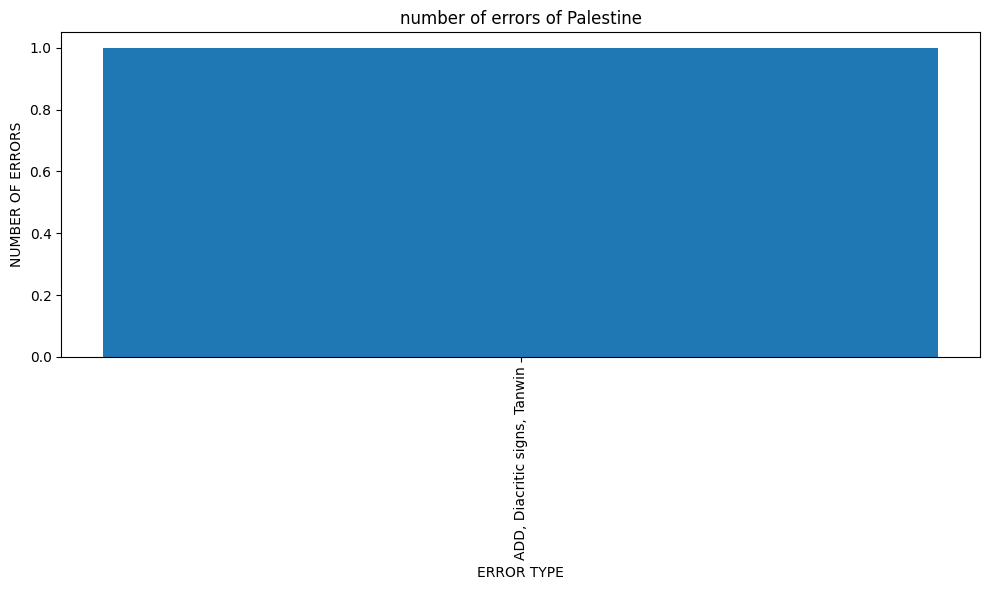

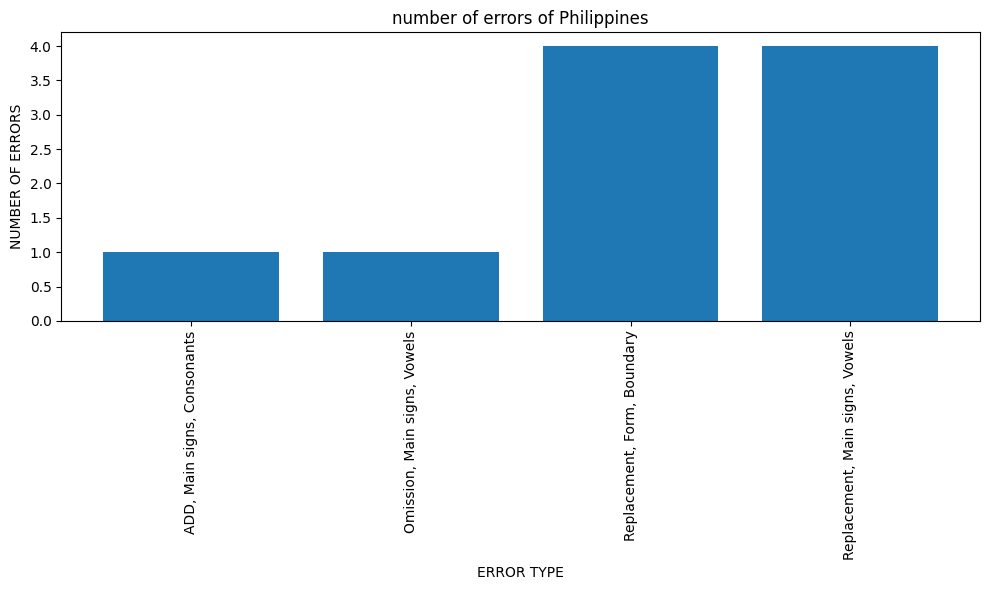

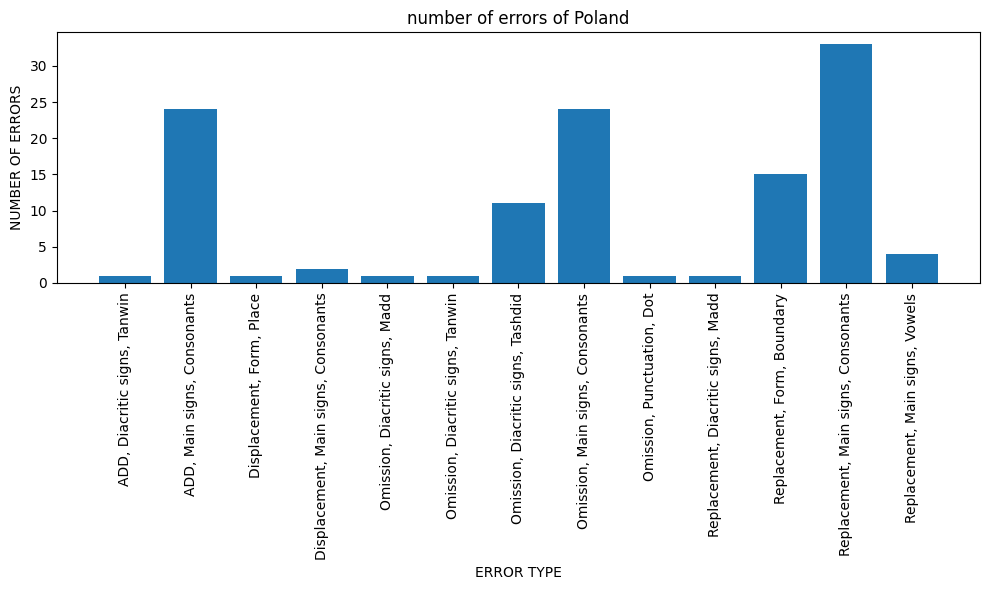

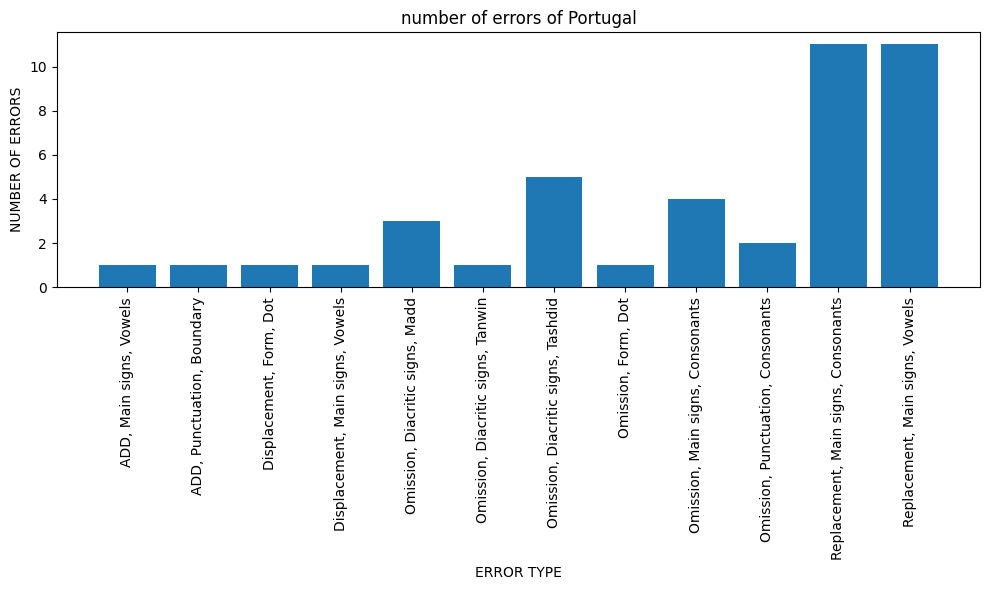

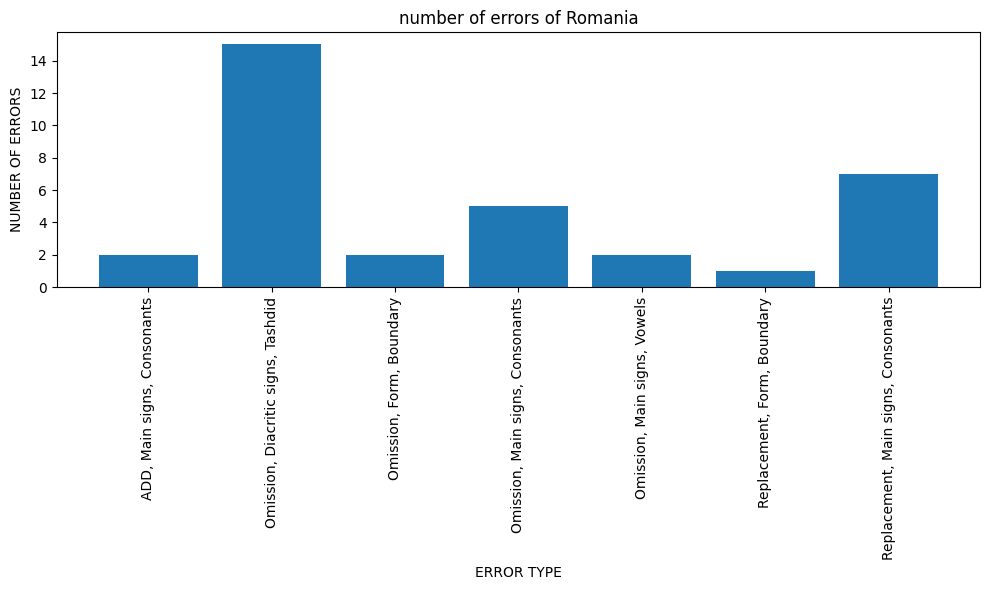

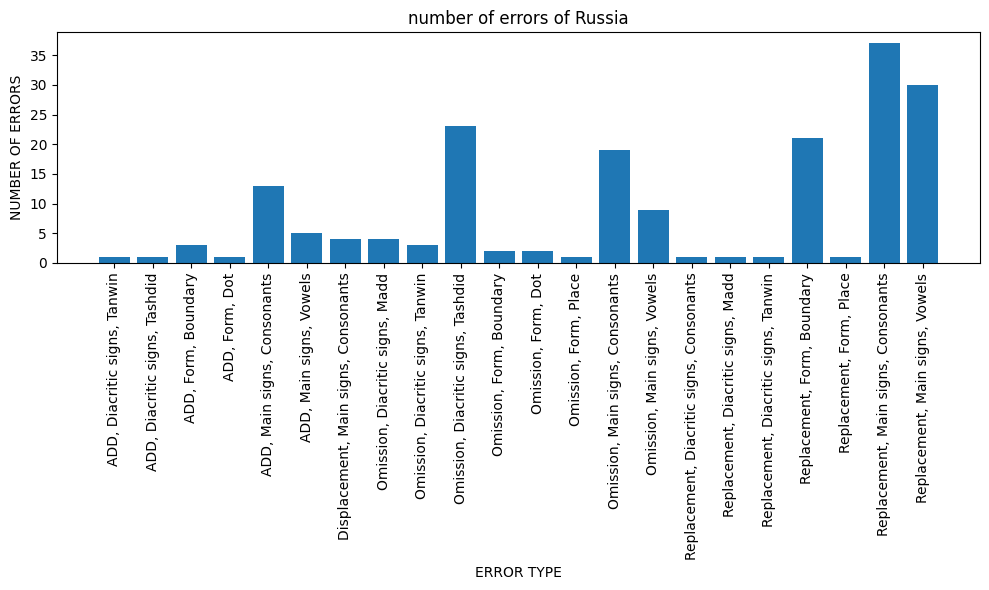

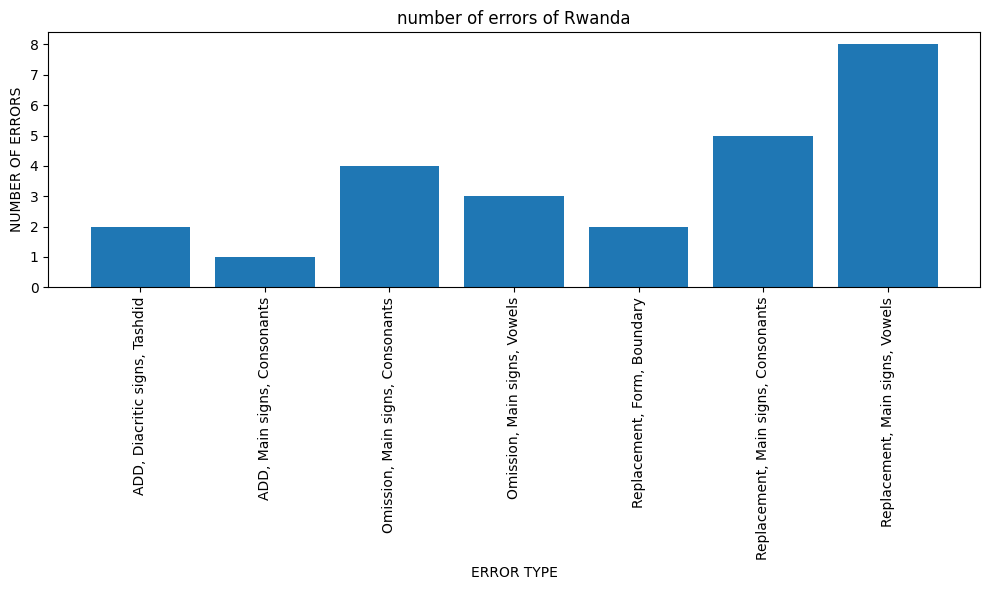

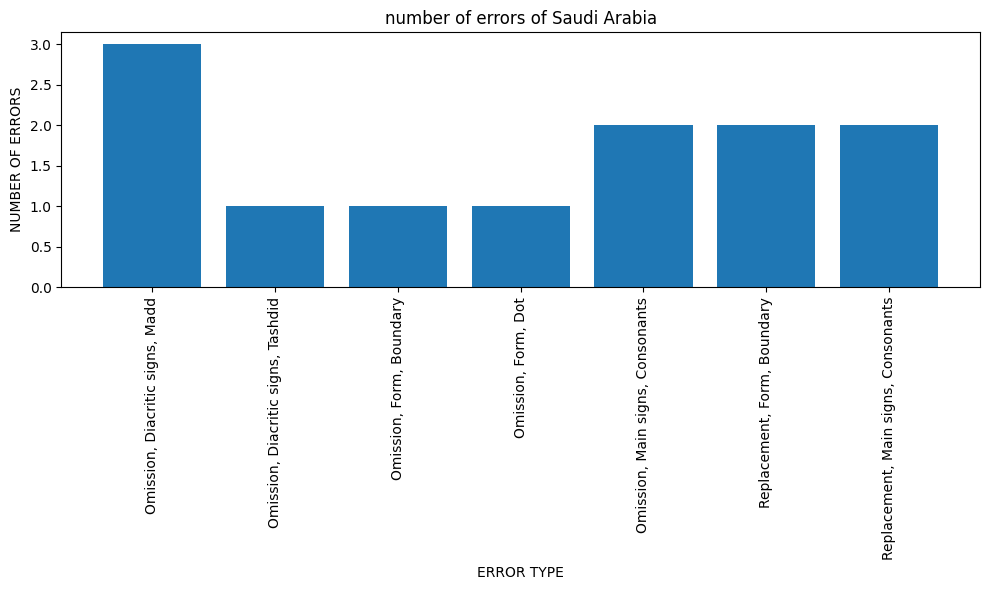

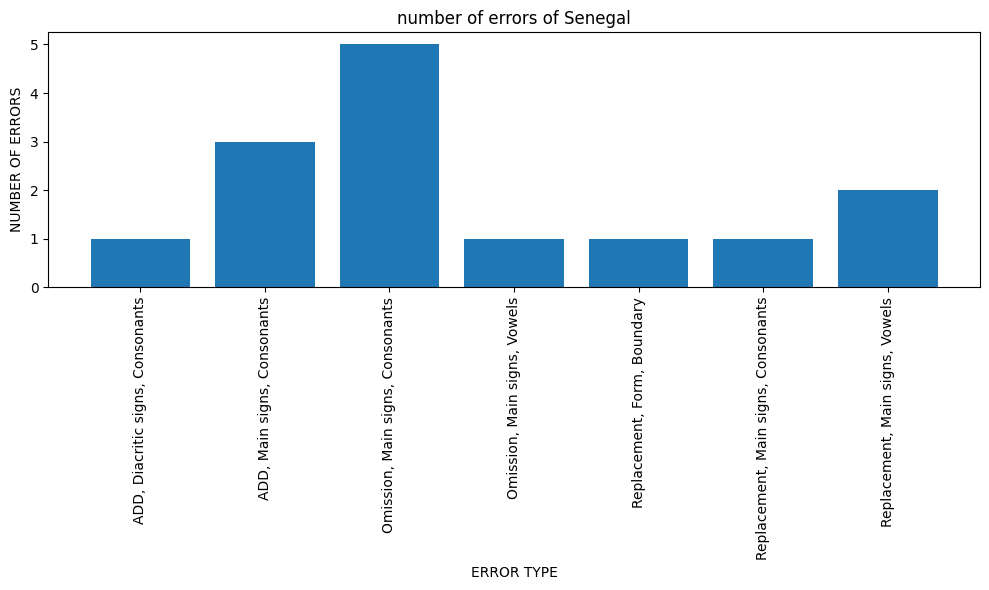

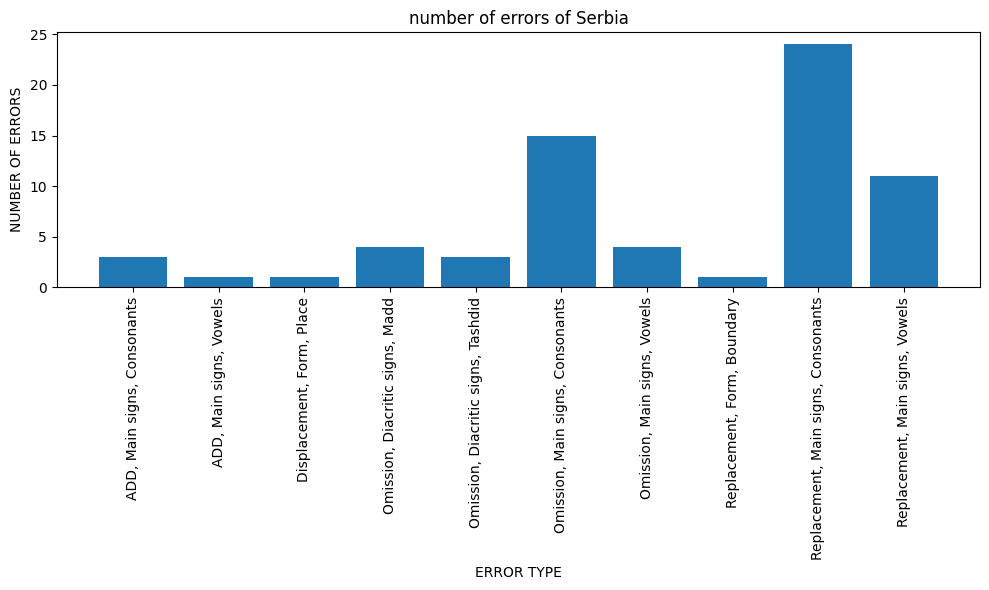

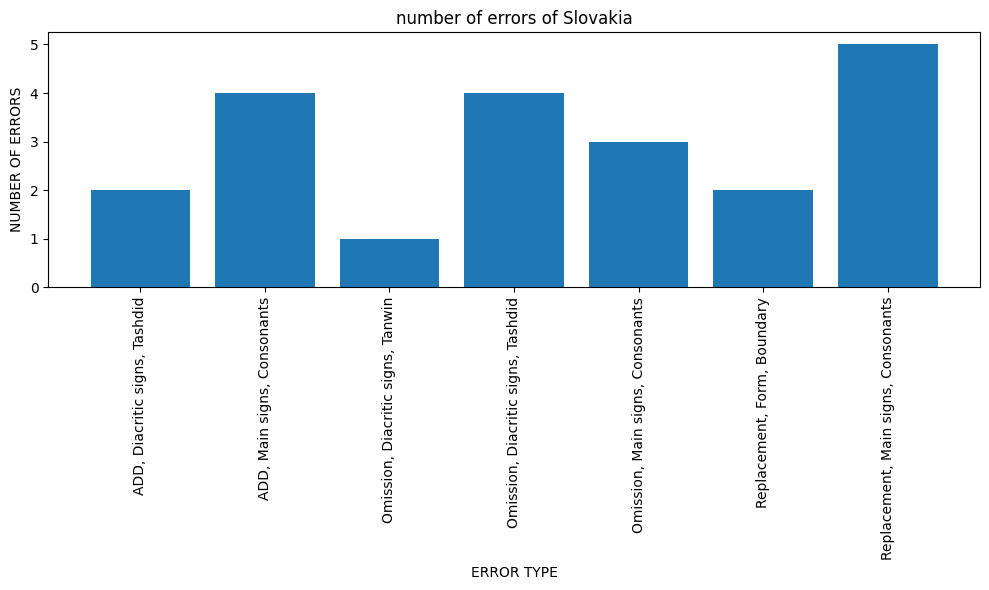

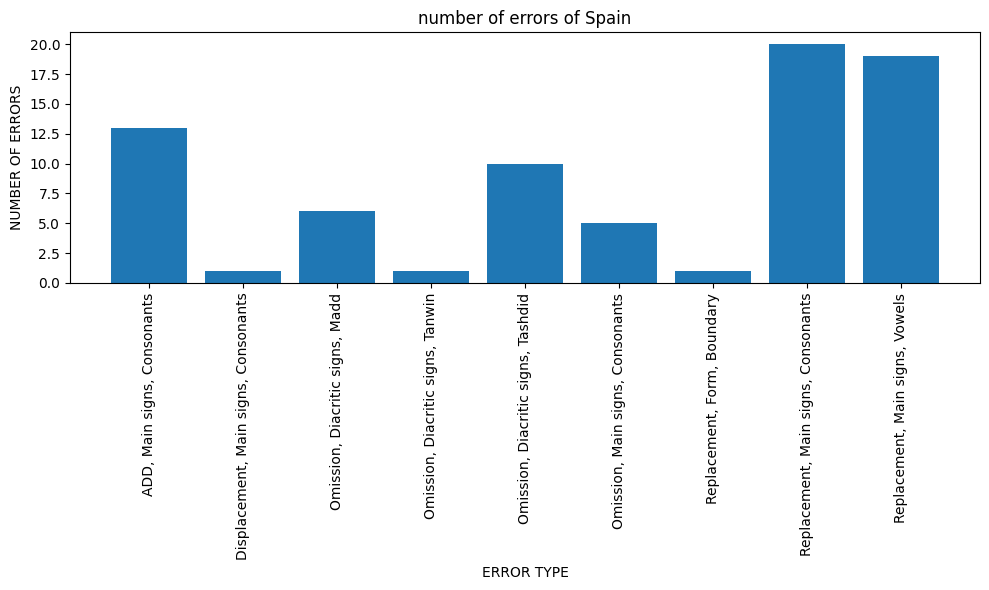

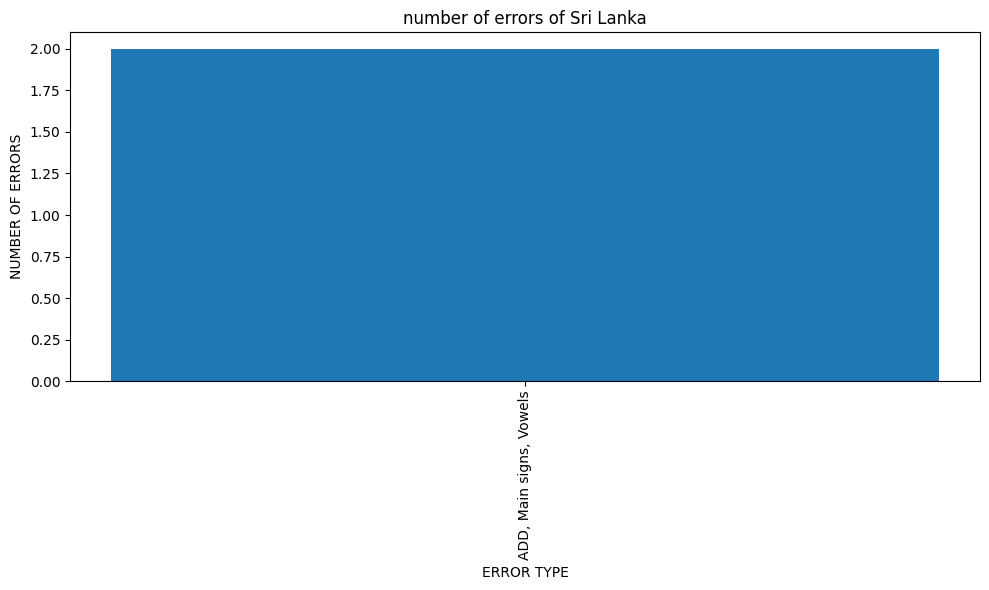

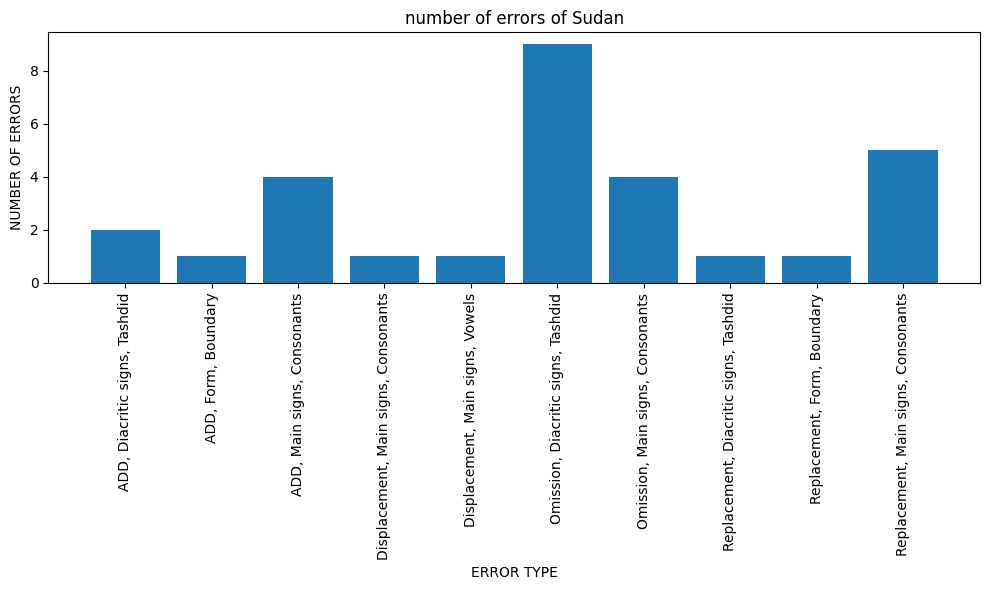

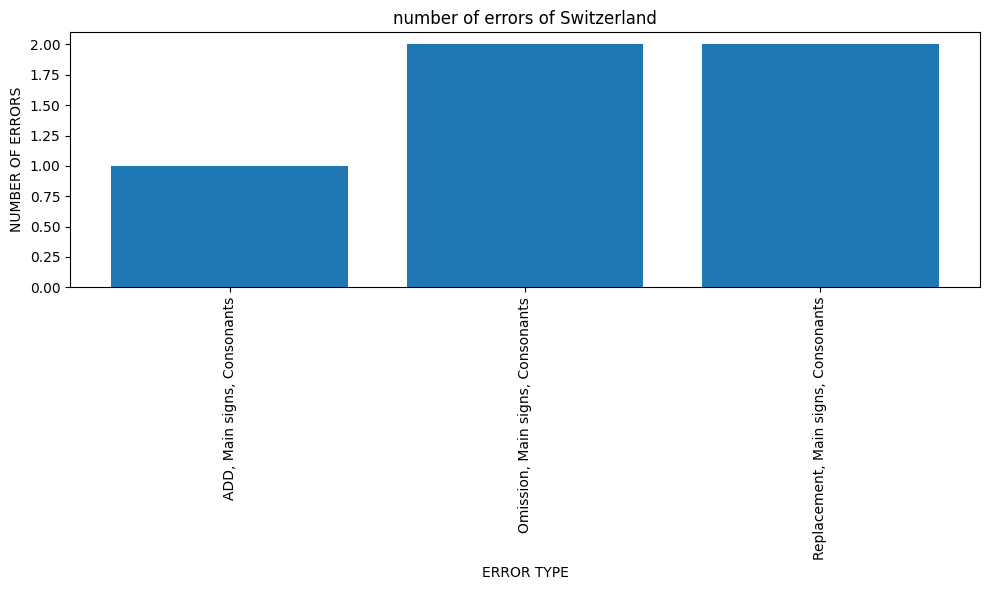

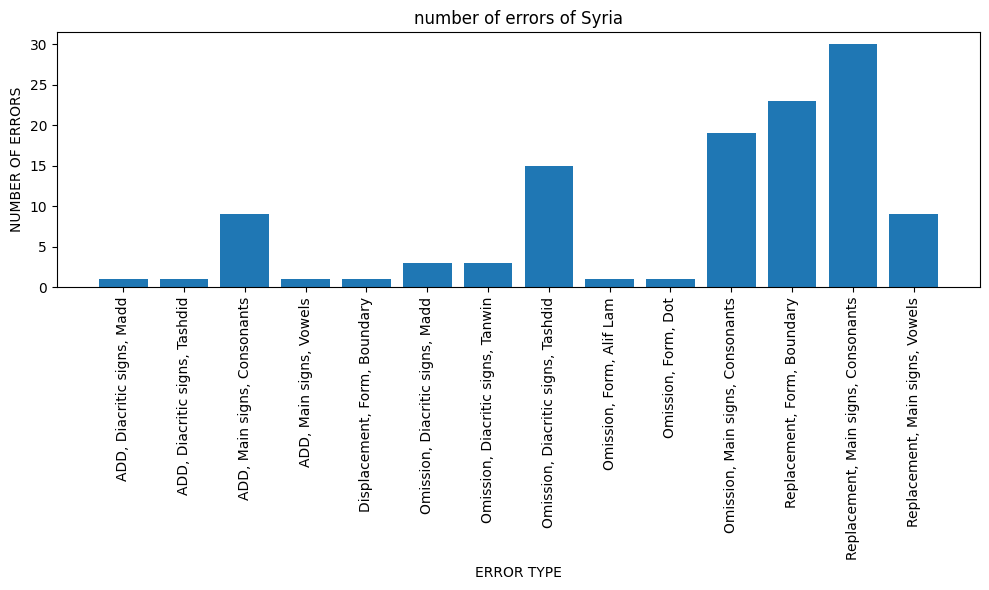

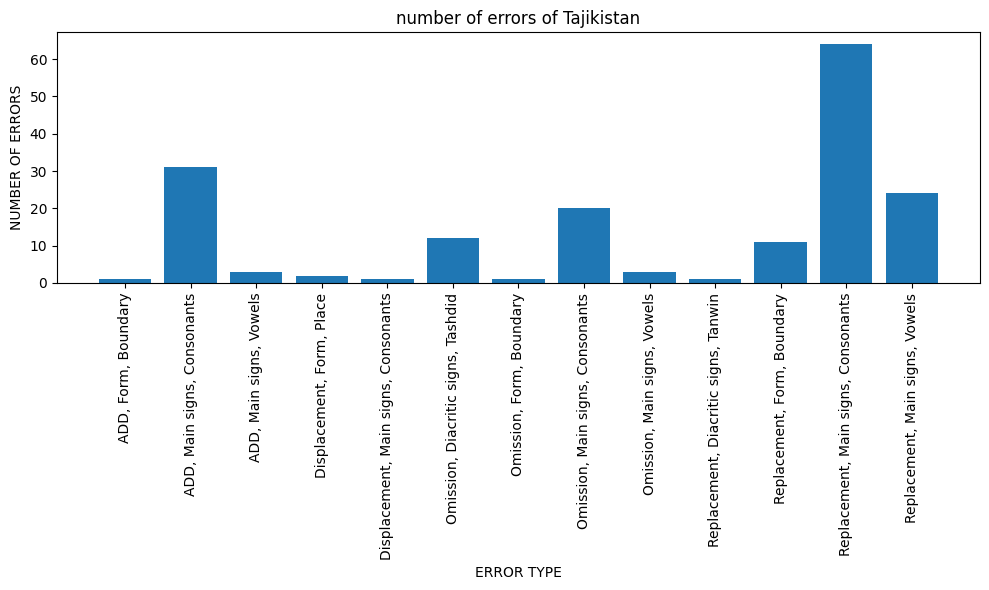

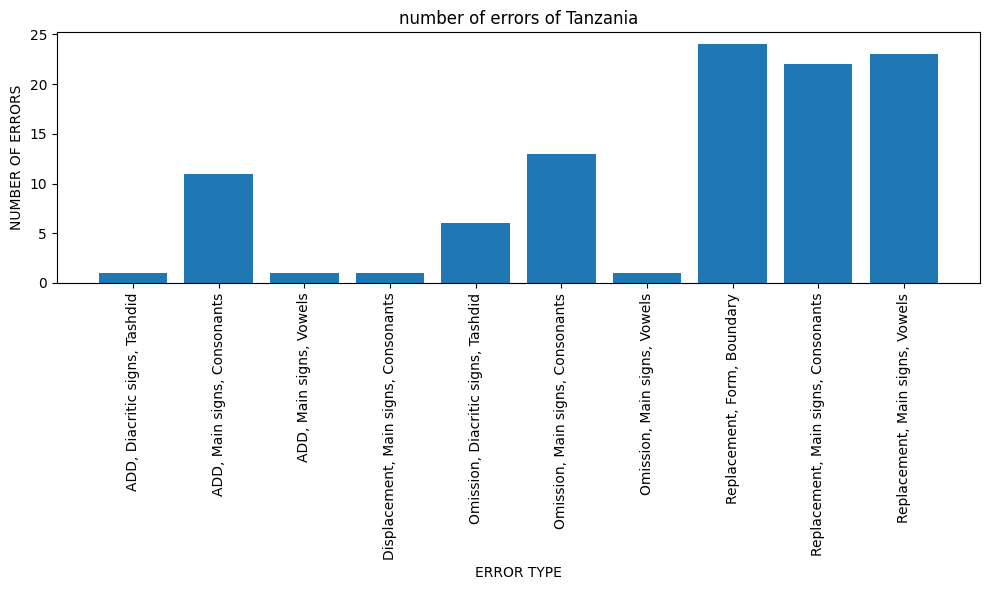

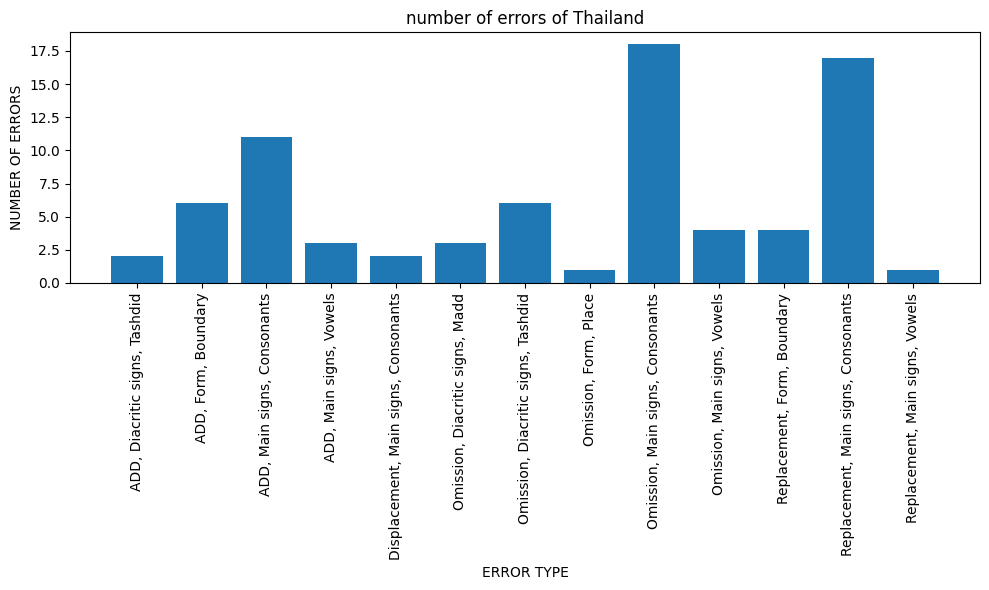

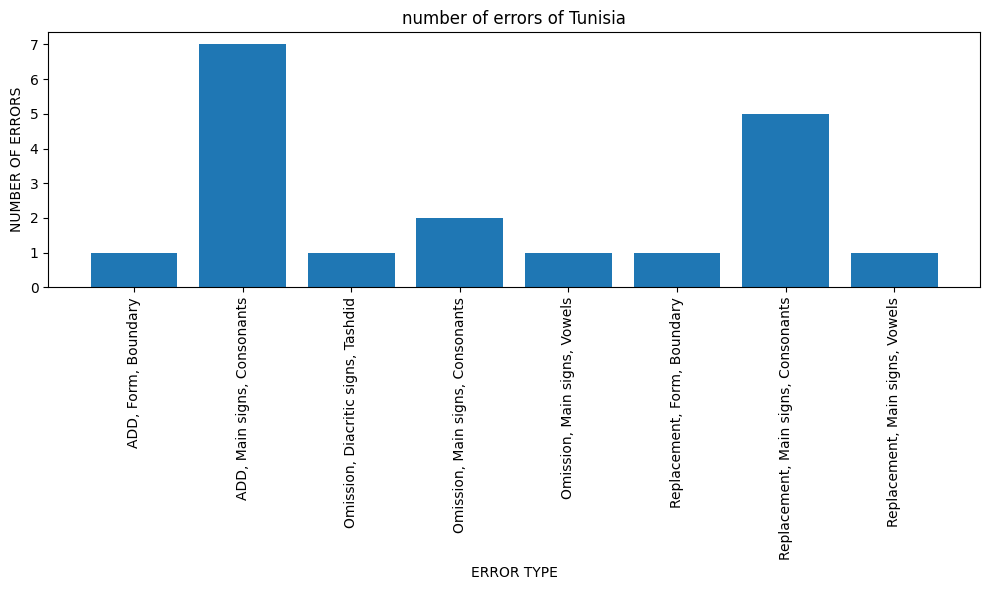

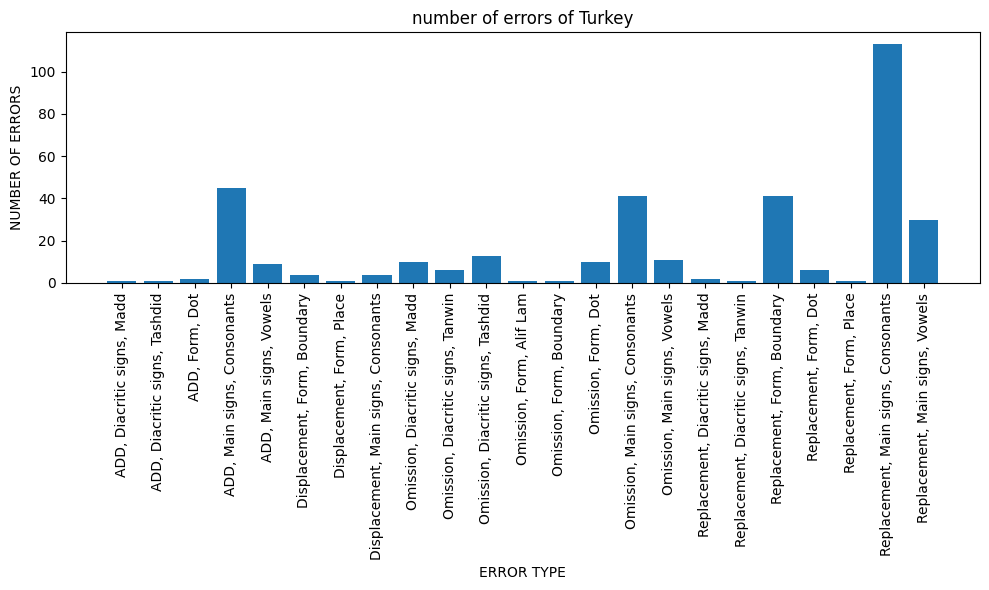

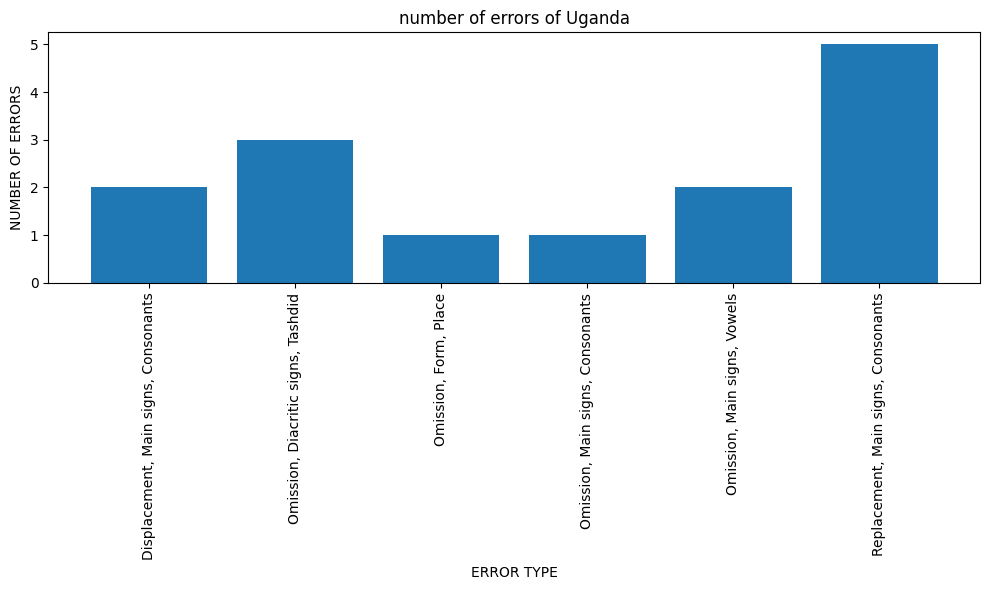

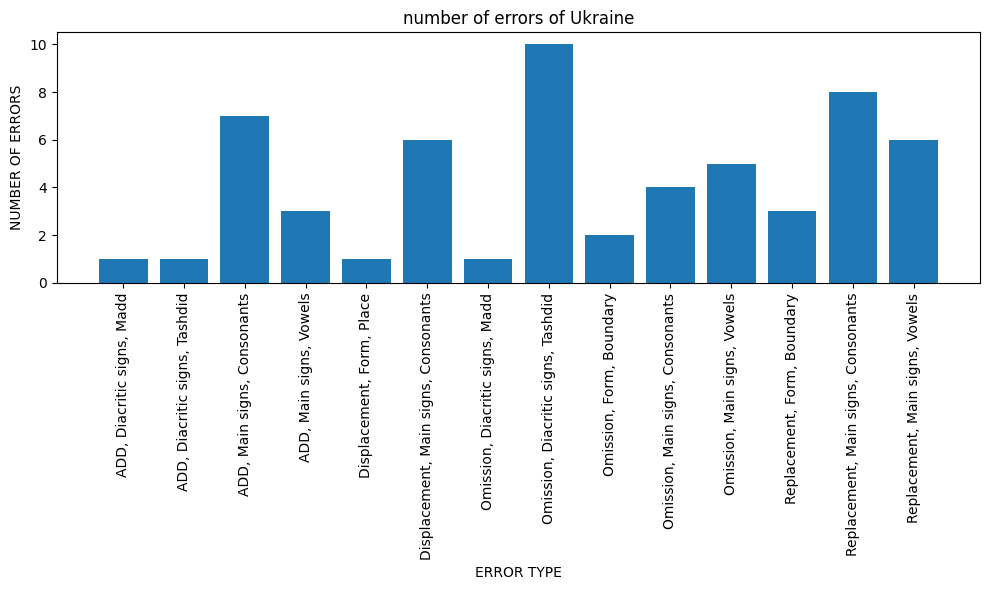

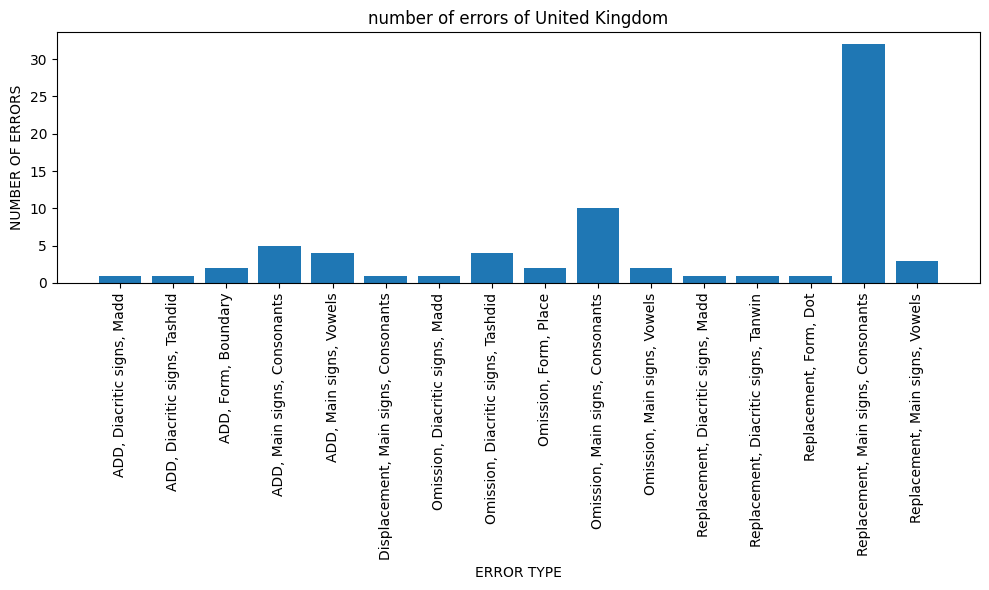

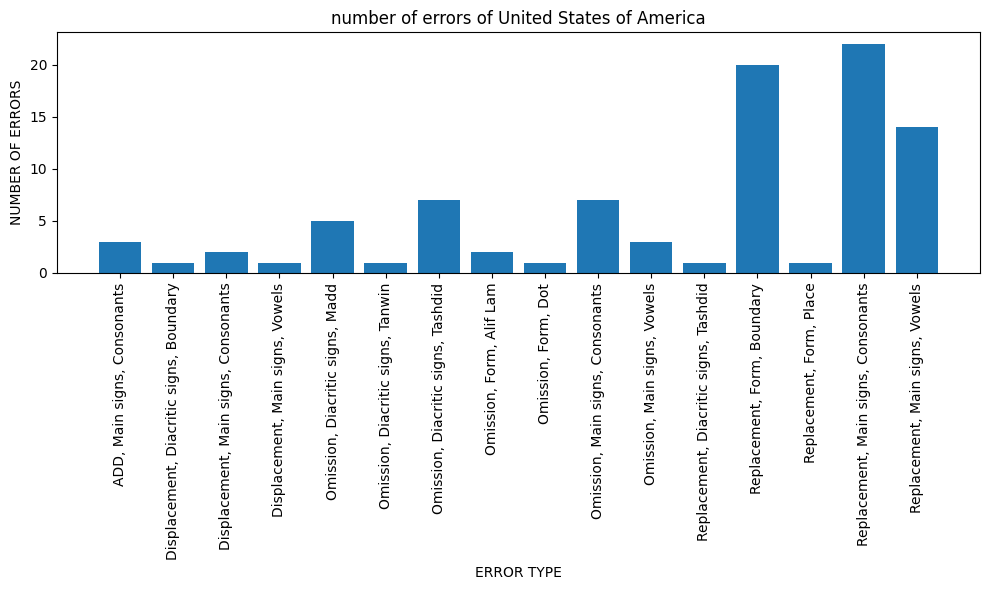

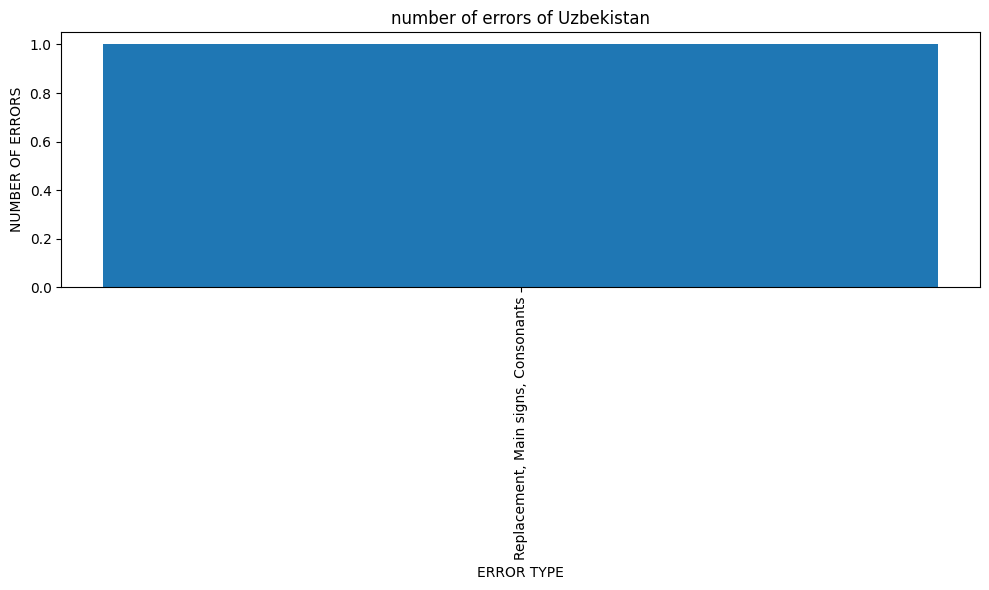

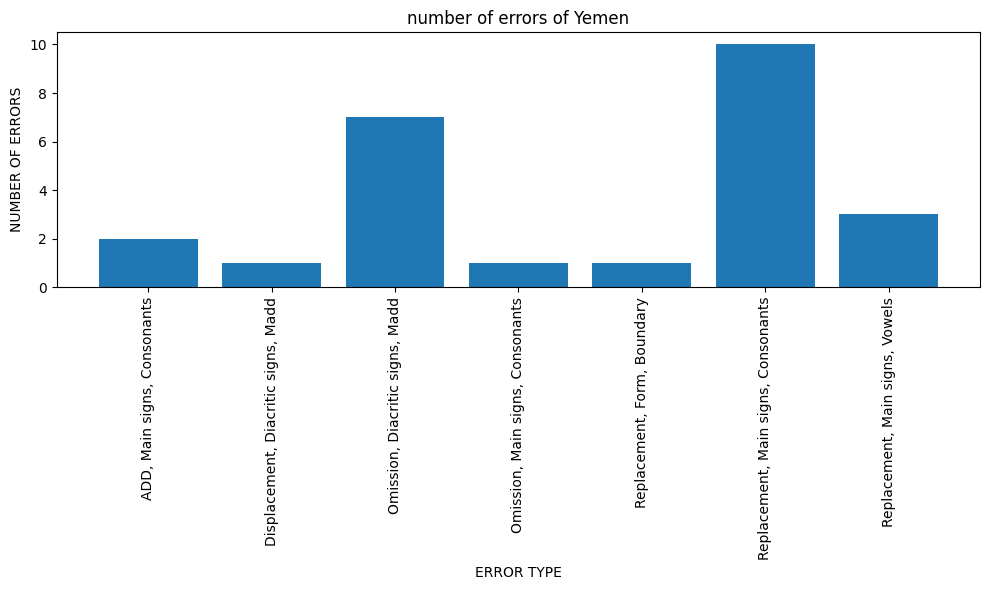

In [21]:
columns_to_check = ['process', 'main_category', 'sub_category_1', 'Nationality']
for column in columns_to_check:
    if column not in df.columns:
        raise KeyError(f"ستون '{column}' در DataFrame وجود ندارد")


grouped_df = df.groupby(['Nationality', 'process', 'main_category', 'sub_category_1']).size().reset_index(name='count')

nationalities = grouped_df['Nationality'].unique()

# رسم نمودارها برای هر nationality
for nationality in nationalities:
    nationality_df = grouped_df[grouped_df['Nationality'] == nationality]
    plt.figure(figsize=(10, 6))
    plt.bar(nationality_df.apply(lambda x: f"{x['process']}, {x['main_category']}, {x['sub_category_1']}", axis=1), nationality_df['count'])
    plt.xticks(rotation=90)
    plt.xlabel('ERROR TYPE')
    plt.ylabel('NUMBER OF ERRORS')
    plt.title(f'number of errors of {nationality}')
    plt.tight_layout()
    file_name = f'{nationality}_error_chart.png'
    plt.savefig(file_name, dpi=300)  # dpi specifies the resolution (dots per inch), adjust as needed
    plt.show()  # show() is optional if you want to display the plot in the notebook


In [41]:
error_type_df = grouped_df.pivot_table(index='Nationality', columns=['process', 'main_category', 'sub_category_1'], values='count', fill_value=0)
error_type_df['Total Errors'] = error_type_df.sum(axis=1)
error_type_df = error_type_df.astype(int)



# Reset the index to make 'nationality' a column again (optional)
error_type_df = error_type_df.reset_index()
error_type_df.to_csv('out.csv', index=False)